## **Liza Hamadene**
### **Master 2 I2A**

### Self-Attention mechanism: basic implementation

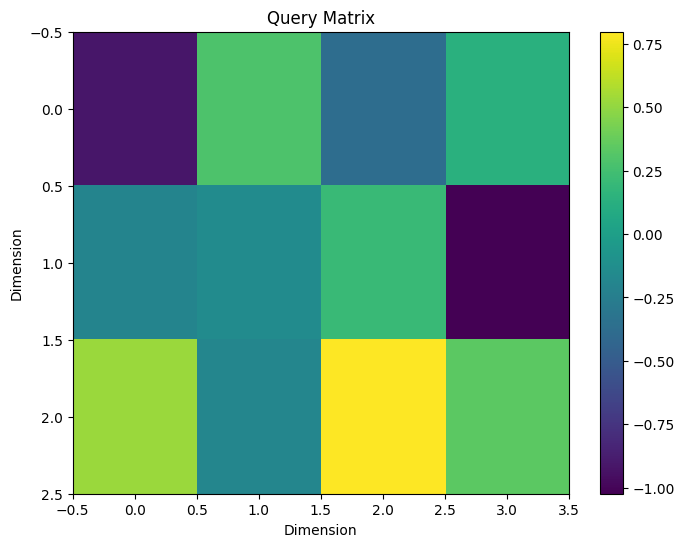

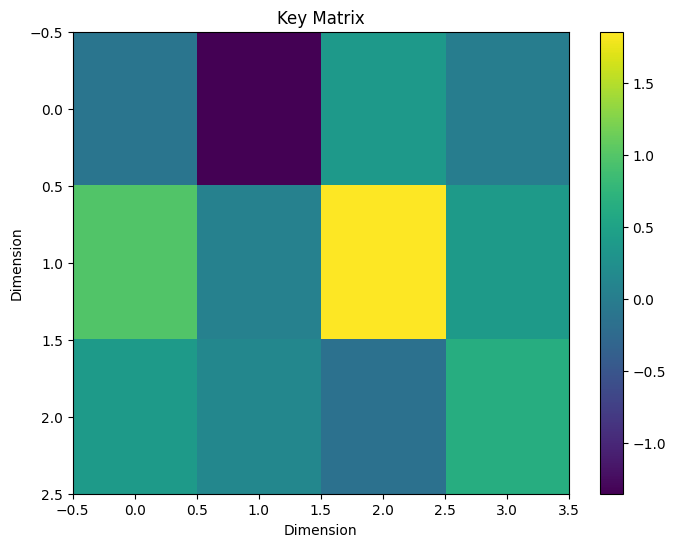

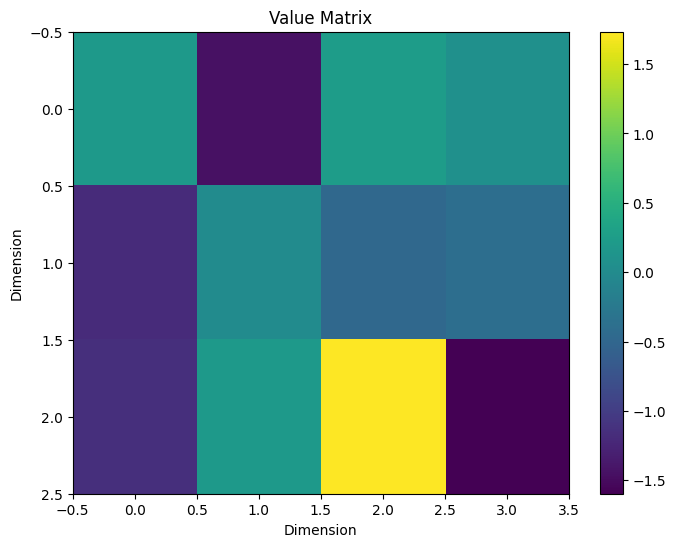

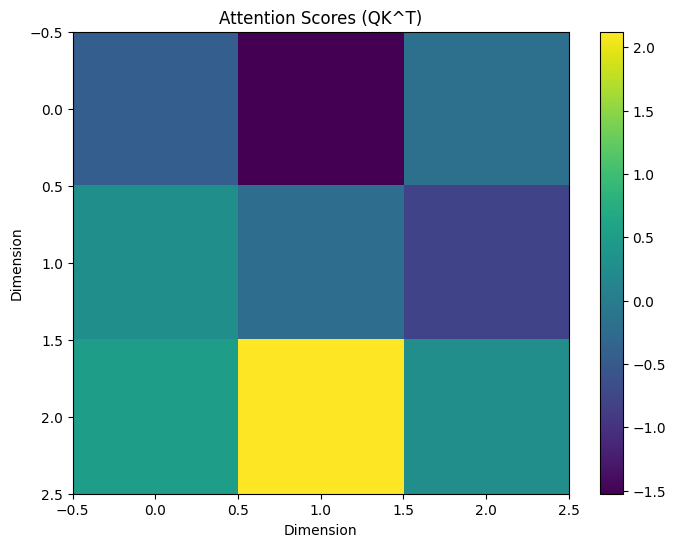

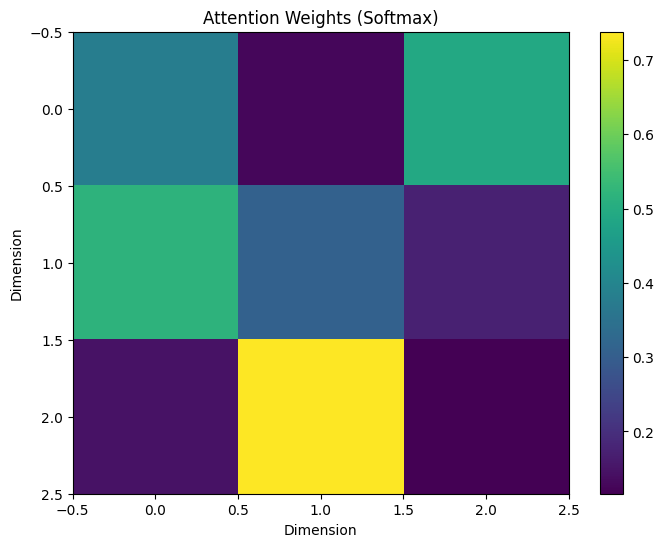

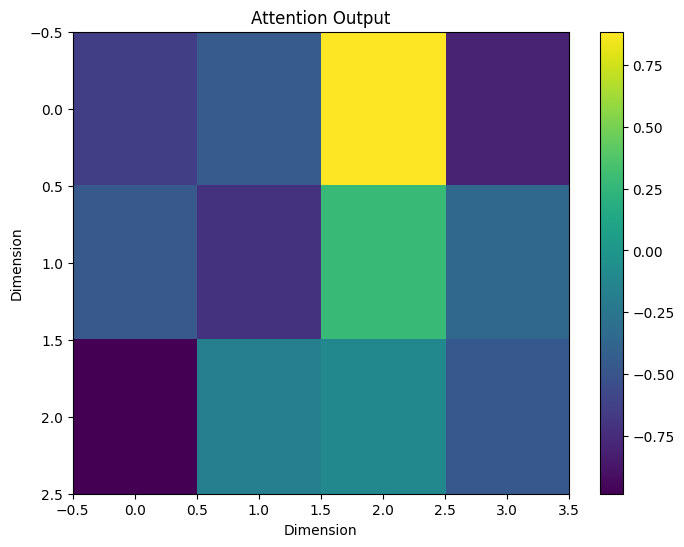

Input Sequence:
 [[1 0 1 0]
 [0 2 1 0]
 [1 1 0 1]]
Query Matrix:
 [[-0.9136075   0.28853318 -0.37248164  0.12943602]
 [-0.20201522 -0.1485942   0.21351886 -1.024427  ]
 [ 0.5226764  -0.19099882  0.7983027   0.34211773]]
Key Matrix:
 [[-0.10053712 -1.3541002   0.3678012   0.00578302]
 [ 0.98767954  0.06121415  1.8565607   0.40048397]
 [ 0.3942008   0.13748258 -0.15873921  0.6473238 ]]
Value Matrix:
 [[ 0.19984984 -1.4415891   0.24773341  0.08016637]
 [-1.1936245   0.00914764 -0.47546554 -0.39720595]
 [-1.1478252   0.19514734  1.7335451  -1.5972267 ]]
Attention Scores:
 [[-0.43510202 -1.5243869  -0.17756204]
 [ 0.29412967 -0.22247824 -0.7970935 ]
 [ 0.50167835  2.123655    0.27451944]]
Attention Weights:
 [[0.38019916 0.12792069 0.49188024]
 [0.51750565 0.30871314 0.17378123]
 [0.14577508 0.73807216 0.11615273]]
Attention Output:
 [[-0.64129907 -0.45093173  0.88606274 -0.8059759 ]
 [-0.46453464 -0.70929354  0.28267857 -0.35870418]
 [-0.9851709  -0.18072924 -0.11345852 -0.4670026 ]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Dimension')
    plt.ylabel('Dimension')
    plt.show()

# Input sequence: a matrix where each row represents a feature vector for a sequence element
input_sequence = np.array([[1, 0, 1, 0],
                           [0, 2, 1, 0],
                           [1, 1, 0, 1]])

# Model parameters
d_model = input_sequence.shape[1]  # Dimension of the embeddings
num_heads = 1  # Number of attention heads (single head for simplicity)

# Create query, key, and value matrices using linear transformations (Dense layers)
query = tf.keras.layers.Dense(d_model)(input_sequence)
key = tf.keras.layers.Dense(d_model)(input_sequence)
value = tf.keras.layers.Dense(d_model)(input_sequence)

# Visualize the query, key, and value matrices
plot_matrix(query, "Query Matrix")
plot_matrix(key, "Key Matrix")
plot_matrix(value, "Value Matrix")

# Compute attention scores by performing dot product of queries and transposed keys
scores = tf.matmul(query, key, transpose_b=True)
plot_matrix(scores, "Attention Scores (QK^T)")

# Apply softmax to the scores to obtain attention weights
attention_weights = tf.nn.softmax(scores, axis=-1)
plot_matrix(attention_weights, "Attention Weights (Softmax)")

# Apply attention weights to the values to get the final attention output
attention_output = tf.matmul(attention_weights, value)
plot_matrix(attention_output, "Attention Output")

# Print the results for reference
print("Input Sequence:\n", input_sequence)
print("Query Matrix:\n", query.numpy())
print("Key Matrix:\n", key.numpy())
print("Value Matrix:\n", value.numpy())
print("Attention Scores:\n", scores.numpy())
print("Attention Weights:\n", attention_weights.numpy())
print("Attention Output:\n", attention_output.numpy())

### Self-Attention mechanism: Using a sentence as input

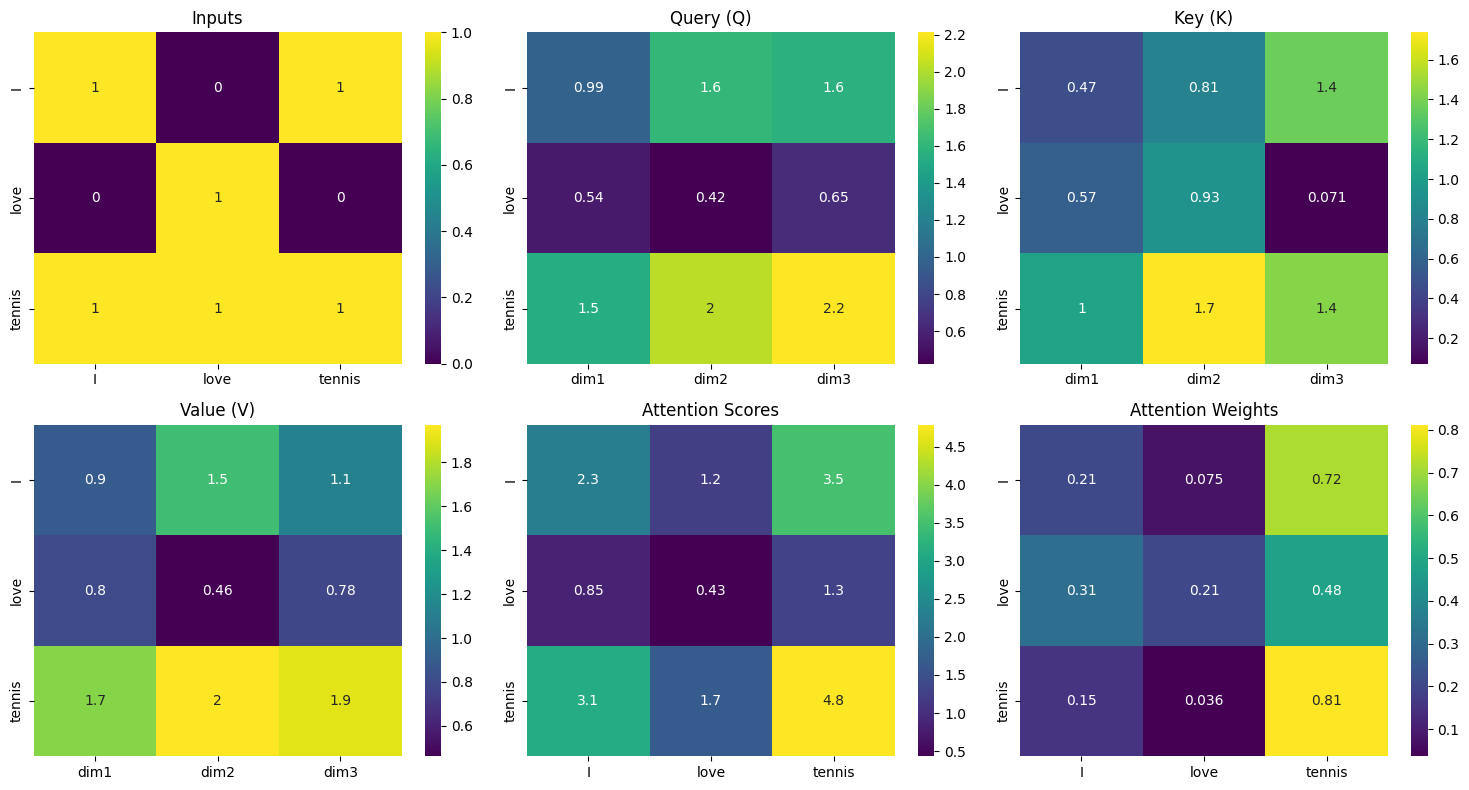

Phrase: ['I', 'love', 'tennis']

Inputs:
 [[1 0 1]
 [0 1 0]
 [1 1 1]]

Query (Q):
 [[0.98640072 1.60696237 1.56642614]
 [0.54488318 0.4236548  0.64589411]
 [1.5312839  2.03061717 2.21232025]]

Key (K):
 [[0.47057082 0.81194344 1.36151477]
 [0.56804456 0.92559664 0.07103606]
 [1.03861538 1.73754007 1.43255082]]

Value (V):
 [[0.89643118 1.50993317 1.12197163]
 [0.79915856 0.46147936 0.78052918]
 [1.69558974 1.97141253 1.90250081]]

Attention Scores:
 [[2.25261651 1.24649419 3.4991107 ]
 [0.85435382 0.43158847 1.28594229]
 [3.10697034 1.67808266 4.78505299]]

Attention Weights:
 [[0.2064511  0.07548555 0.71806334]
 [0.31299554 0.20508481 0.48191965]
 [0.15163339 0.03632761 0.812039  ]]

Output:
 [[1.46293497 1.76216147 1.65666705]
 [1.26161226 1.5173072  1.42809932]
 [1.54184542 1.84658459 1.74338797]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Example sentence embeddings (3 dimensions per word)
embeddings = {
    "I": [1, 0, 1],
    "love": [0, 1, 0],
    "tennis": [1, 1, 1]
}

# Convert sentence to sequence of embeddings
sentence = ["I", "love", "tennis"]
inputs = np.array([embeddings[word] for word in sentence])

# Initialize weights for Query, Key, and Value matrices
np.random.seed(0)
Wq = np.random.rand(3, 3)
Wk = np.random.rand(3, 3)
Wv = np.random.rand(3, 3)

# Compute Query, Key, and Value matrices
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

# Compute attention scores
scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

# Apply softmax to get attention weights
attention_weights = softmax(scores)

# Compute the output of the self-attention mechanism
output = np.dot(attention_weights, V)

# Plotting the inputs
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 3, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 3, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 3, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

plt.tight_layout()
plt.show()

print("Phrase:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)

### Self-Attention mechanism: Word embeddings computing

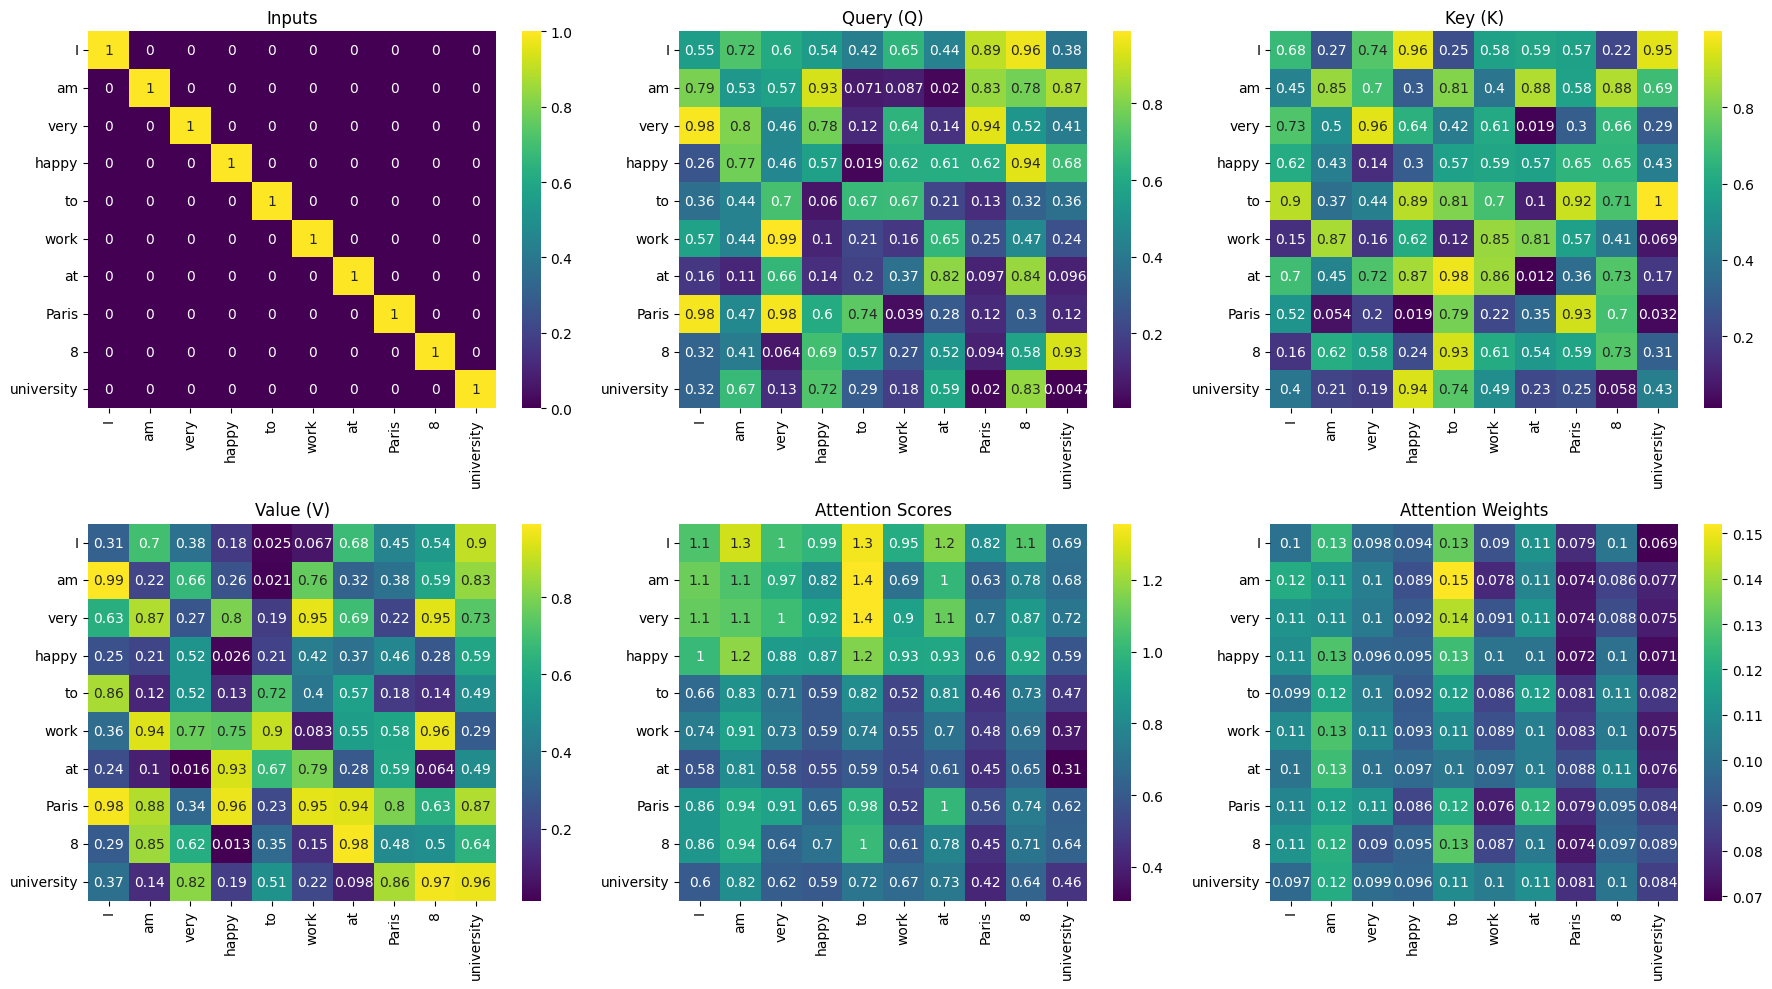

Sentence: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Inputs:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Query (Q):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038256 0.1289263  0.3154283

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Tokenize the sentence
sentence = "I am very happy to work at Paris 8 university".split()
vocab_size = len(sentence)

# Create one-hot embeddings for each word
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)

# Convert sentence to sequence of embeddings
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

# Initialize weights for Query, Key, and Value matrices
np.random.seed(0)
Wq = np.random.rand(vocab_size, vocab_size)
Wk = np.random.rand(vocab_size, vocab_size)
Wv = np.random.rand(vocab_size, vocab_size)

# Compute Query, Key, and Value matrices
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

# Compute attention scores
scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

# Apply softmax to get attention weights
attention_weights = softmax(scores)

# Compute the output of the self-attention mechanism
output = np.dot(attention_weights, V)

# Visualization
plt.figure(figsize=(18, 10))

# Plotting the inputs
plt.subplot(2, 3, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 3, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 3, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 3, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

plt.tight_layout()
plt.show()

print("Sentence:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)

### Complete Encoder Implementation

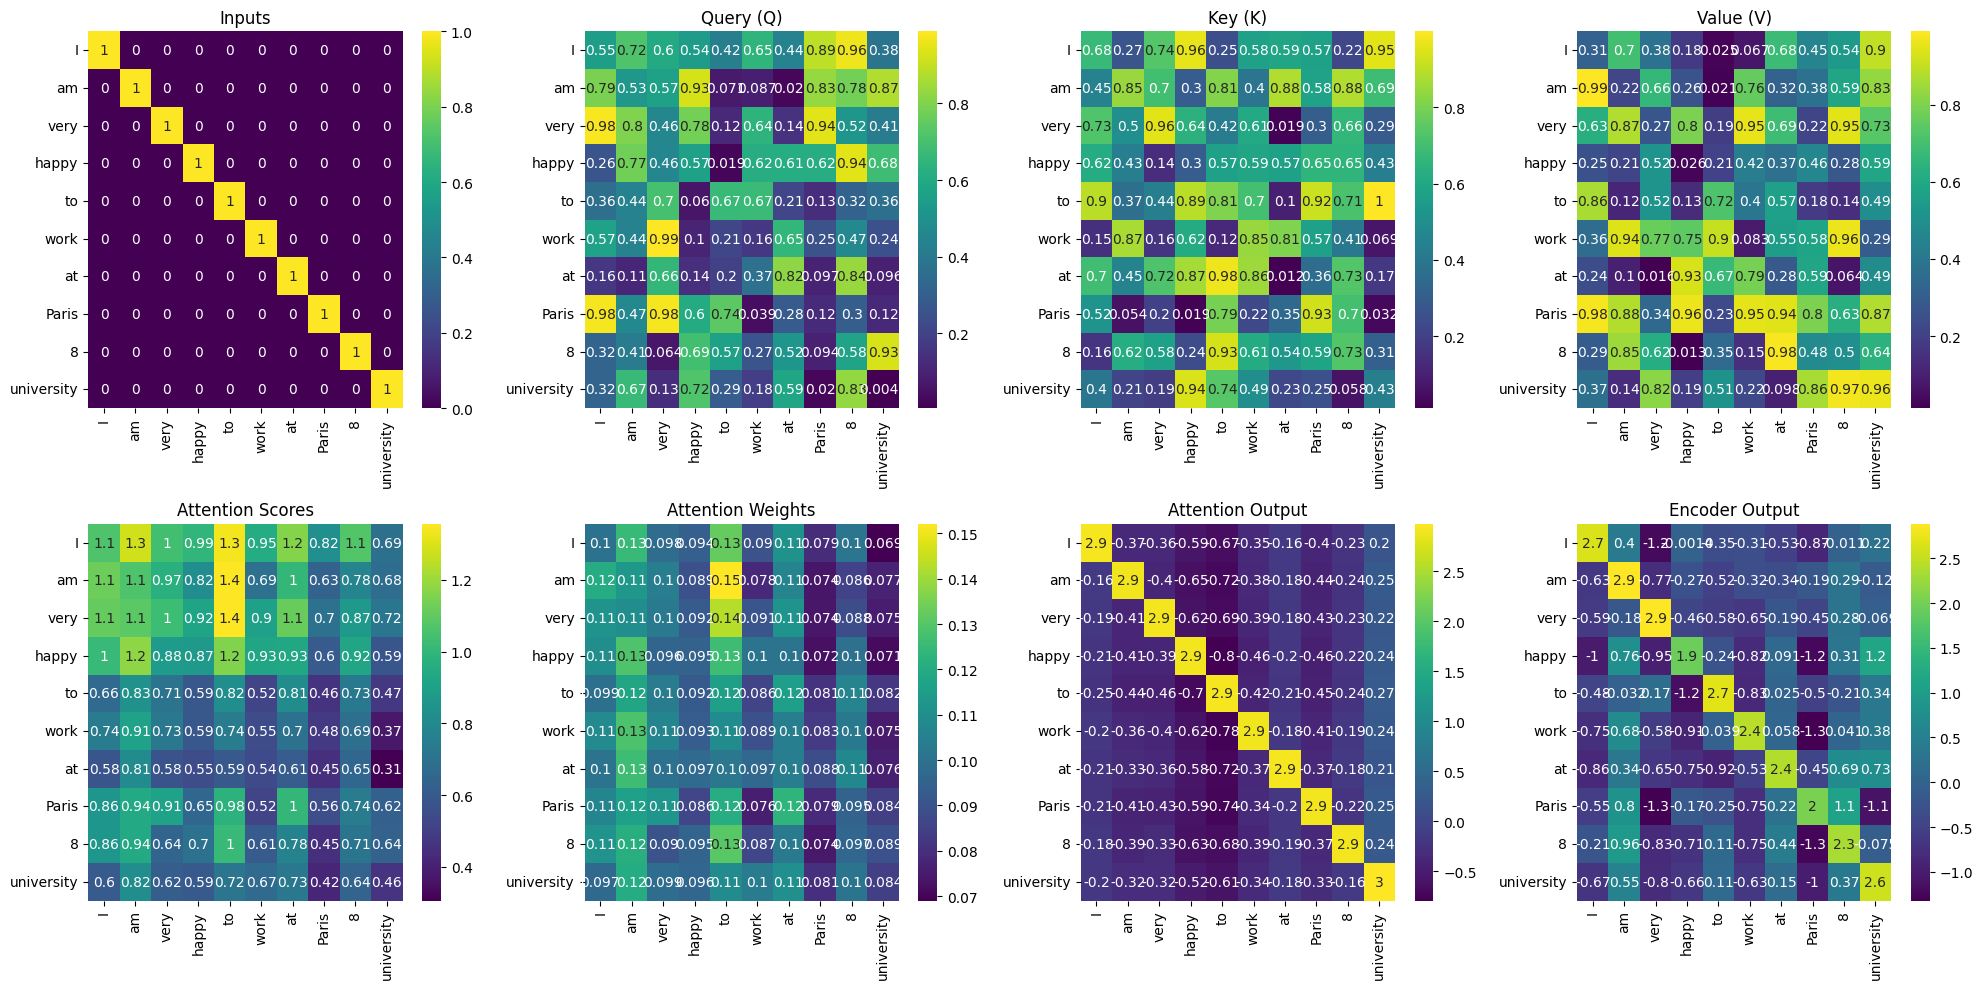

Sentence: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Inputs:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Query (Q):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038256 0.1289263  0.3154283

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Tokenize the sentence
sentence = "I am very happy to work at Paris 8 university".split()
vocab_size = len(sentence)

# Create one-hot embeddings for each word
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)

# Convert sentence to sequence of embeddings
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
np.random.seed(0)
Wq = np.random.rand(vocab_size, vocab_size)
Wk = np.random.rand(vocab_size, vocab_size)
Wv = np.random.rand(vocab_size, vocab_size)
W1 = np.random.rand(vocab_size, vocab_size)  # Feed-Forward layer 1 weights
W2 = np.random.rand(vocab_size, vocab_size)  # Feed-Forward layer 2 weights

# Self-Attention Layer
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
attention_weights = softmax(scores)
attention_output = np.dot(attention_weights, V)

# Add & Norm Layer (Self-Attention Output + Inputs)
attention_output = layer_norm(attention_output + inputs)

# Feed-Forward Layer
ffn_output = np.dot(attention_output, W1)
ffn_output = np.maximum(0, ffn_output)  # ReLU activation
ffn_output = np.dot(ffn_output, W2)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output + attention_output)

# Visualization
plt.figure(figsize=(20, 10))

# Plotting the inputs
plt.subplot(2, 4, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 4, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 4, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 4, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 4, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 4, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

# Plotting Attention Output
plt.subplot(2, 4, 7)
sns.heatmap(attention_output, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Output')

# Plotting Encoder Output
plt.subplot(2, 4, 8)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Encoder Output')

plt.tight_layout()
plt.show()

print("Sentence:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nAttention Output:\n", attention_output)
print("\nFeed-Forward Output:\n", ffn_output)
print("\nEncoder Output:\n", encoder_output)

### Complete Encoder-Decoder Implementation Using Self-Attention

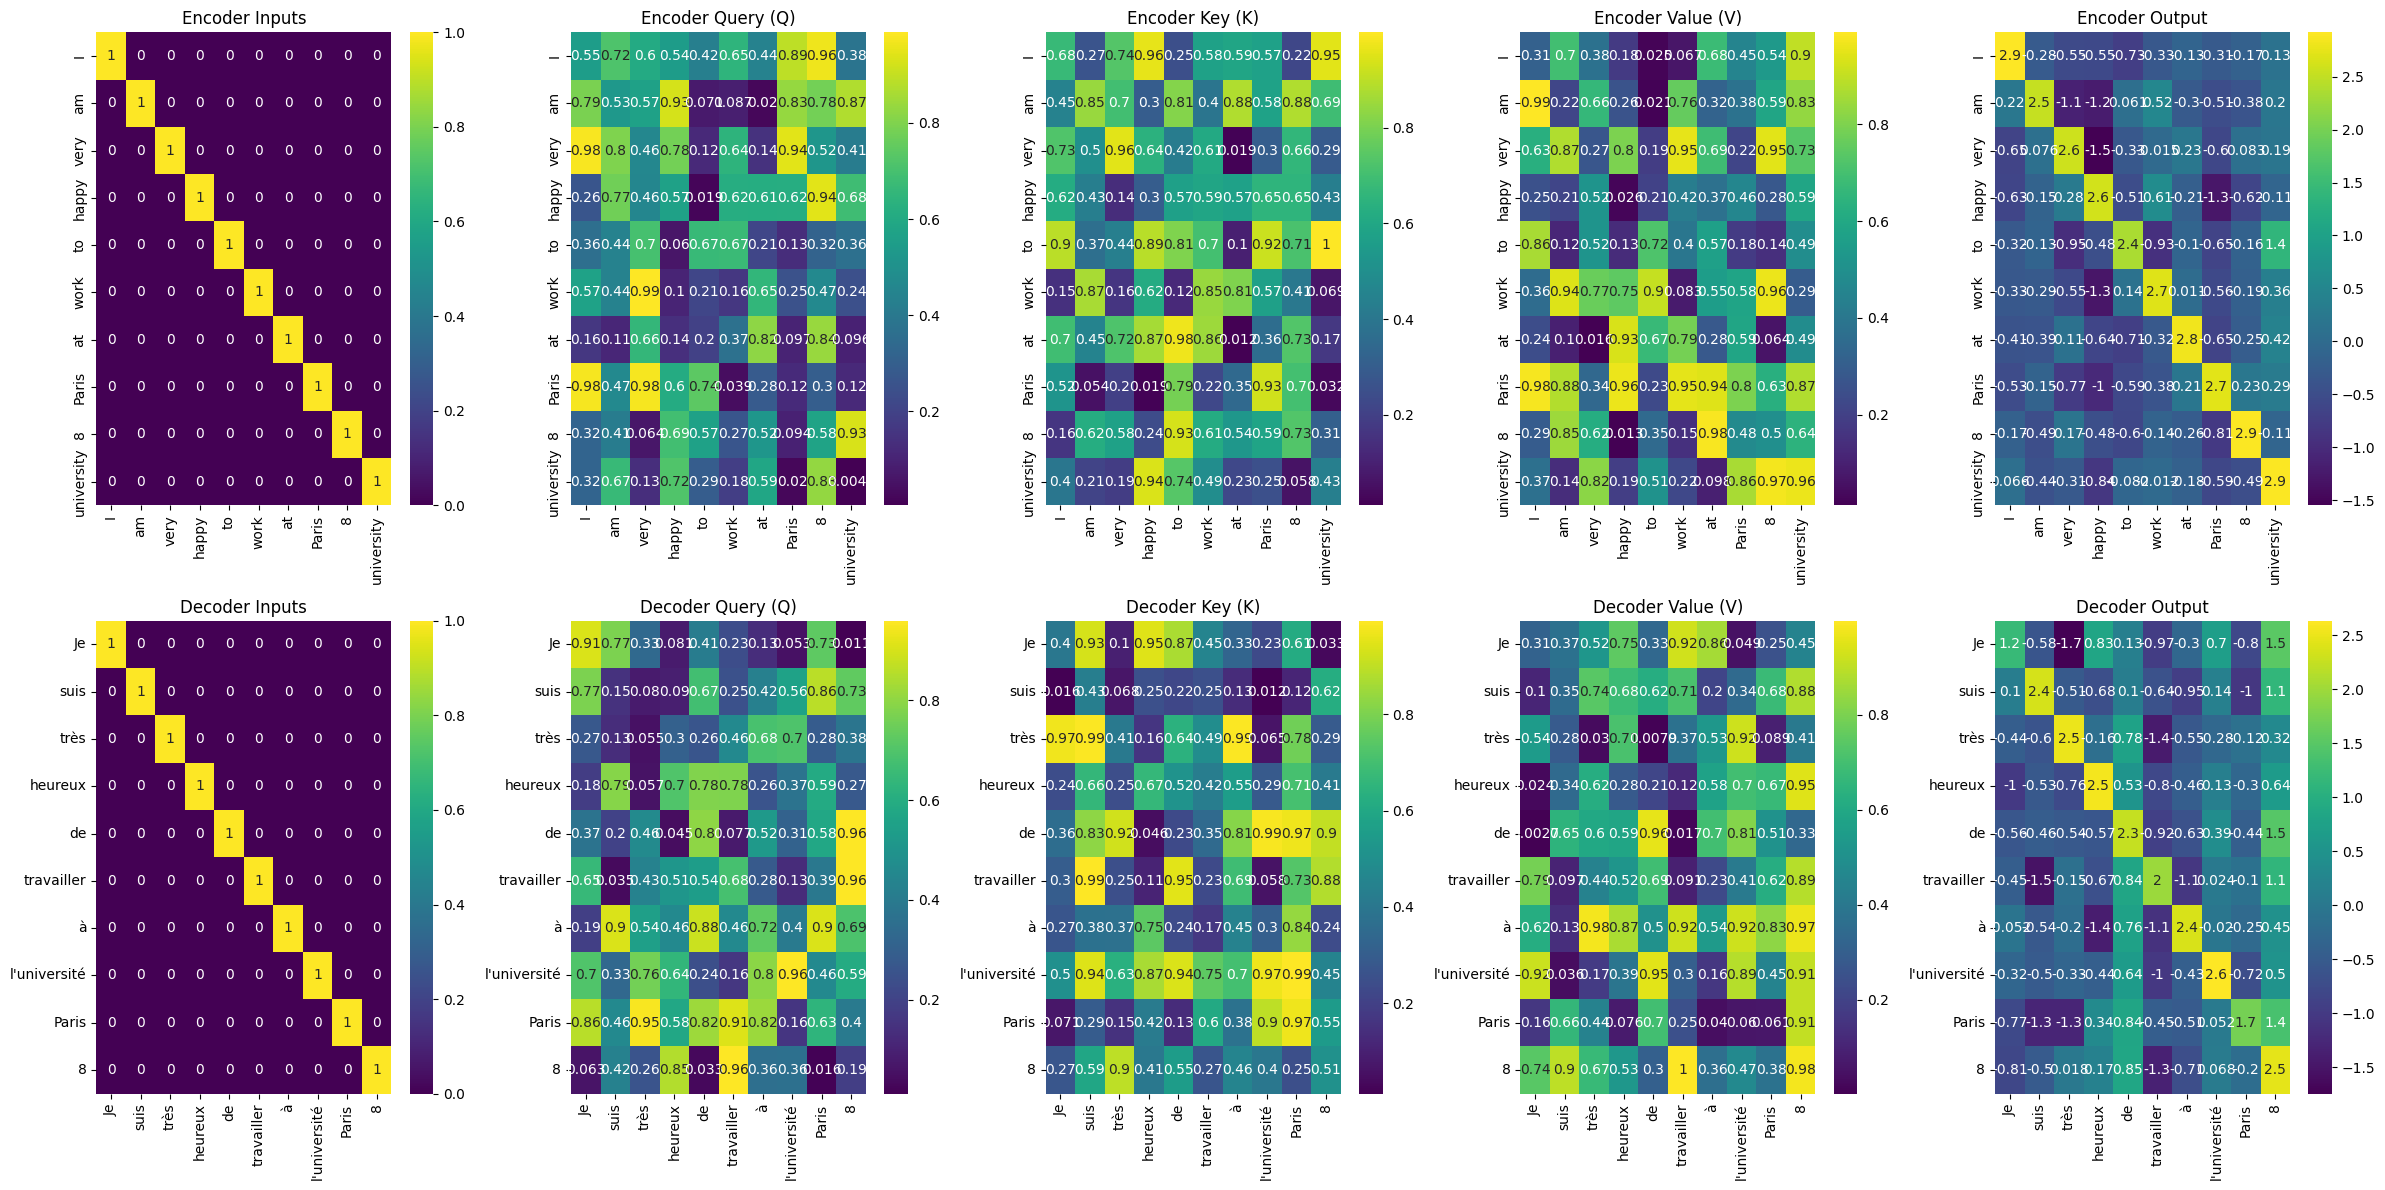

Encoder Sentence: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Encoder Inputs:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Encoder Query (Q):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Tokenize the sentences
encoder_sentence = "I am very happy to work at Paris 8 university".split()
decoder_sentence = "Je suis très heureux de travailler à l'université Paris 8".split()

# Vocabulary sizes
encoder_vocab_size = len(encoder_sentence)
decoder_vocab_size = len(decoder_sentence)

# Create one-hot embeddings for each word
encoder_word_to_index = {word: idx for idx, word in enumerate(encoder_sentence)}
decoder_word_to_index = {word: idx for idx, word in enumerate(decoder_sentence)}
encoder_embeddings = np.eye(encoder_vocab_size)
decoder_embeddings = np.eye(decoder_vocab_size)

# Convert sentences to sequences of embeddings
encoder_inputs = np.array([encoder_embeddings[encoder_word_to_index[word]] for word in encoder_sentence])
decoder_inputs = np.array([decoder_embeddings[decoder_word_to_index[word]] for word in decoder_sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
np.random.seed(0)
Wq_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wk_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wv_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)

Wq_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wk_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wv_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)

W1_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 1 weights for encoder
W2_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 2 weights for encoder

W1_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 1 weights for decoder
W2_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 2 weights for decoder

# Encoder Self-Attention Layer
Q_encoder = np.dot(encoder_inputs, Wq_encoder)
K_encoder = np.dot(encoder_inputs, Wk_encoder)
V_encoder = np.dot(encoder_inputs, Wv_encoder)

scores_encoder = np.dot(Q_encoder, K_encoder.T) / np.sqrt(K_encoder.shape[1])
attention_weights_encoder = softmax(scores_encoder)
attention_output_encoder = np.dot(attention_weights_encoder, V_encoder)

# Add & Norm Layer (Encoder Self-Attention Output + Inputs)
attention_output_encoder = layer_norm(attention_output_encoder + encoder_inputs)

# Encoder Feed-Forward Layer
ffn_output_encoder = np.dot(attention_output_encoder, W1_encoder)
ffn_output_encoder = np.maximum(0, ffn_output_encoder)  # ReLU activation
ffn_output_encoder = np.dot(ffn_output_encoder, W2_encoder)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output_encoder + attention_output_encoder)

# Decoder Self-Attention Layer
Q_decoder = np.dot(decoder_inputs, Wq_decoder)
K_decoder = np.dot(decoder_inputs, Wk_decoder)
V_decoder = np.dot(decoder_inputs, Wv_decoder)

scores_decoder = np.dot(Q_decoder, K_decoder.T) / np.sqrt(K_decoder.shape[1])
attention_weights_decoder = softmax(scores_decoder)
attention_output_decoder = np.dot(attention_weights_decoder, V_decoder)

# Add & Norm Layer (Decoder Self-Attention Output + Inputs)
attention_output_decoder = layer_norm(attention_output_decoder + decoder_inputs)

# Decoder Cross-Attention Layer (using encoder outputs)
Q_cross = np.dot(attention_output_decoder, Wq_decoder)
K_cross = np.dot(encoder_output, Wk_encoder)
V_cross = np.dot(encoder_output, Wv_encoder)

scores_cross = np.dot(Q_cross, K_cross.T) / np.sqrt(K_cross.shape[1])
attention_weights_cross = softmax(scores_cross)
cross_attention_output = np.dot(attention_weights_cross, V_cross)

# Add & Norm Layer (Cross-Attention Output + Decoder Self-Attention Output)
cross_attention_output = layer_norm(cross_attention_output + attention_output_decoder)

# Decoder Feed-Forward Layer
ffn_output_decoder = np.dot(cross_attention_output, W1_decoder)
ffn_output_decoder = np.maximum(0, ffn_output_decoder)  # ReLU activation
ffn_output_decoder = np.dot(ffn_output_decoder, W2_decoder)

# Add & Norm Layer (Feed-Forward Output + Cross-Attention Output)
decoder_output = layer_norm(ffn_output_decoder + cross_attention_output)

# Visualization
plt.figure(figsize=(24, 12))

# Plotting the encoder inputs
plt.subplot(2, 5, 1)
sns.heatmap(encoder_inputs, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Inputs')

# Plotting encoder Query (Q) matrix
plt.subplot(2, 5, 2)
sns.heatmap(Q_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Query (Q)')

# Plotting encoder Key (K) matrix
plt.subplot(2, 5, 3)
sns.heatmap(K_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Key (K)')

# Plotting encoder Value (V) matrix
plt.subplot(2, 5, 4)
sns.heatmap(V_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Value (V)')

# Plotting encoder output
plt.subplot(2, 5, 5)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Output')

# Plotting the decoder inputs
plt.subplot(2, 5, 6)
sns.heatmap(decoder_inputs, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Inputs')

# Plotting decoder Query (Q) matrix
plt.subplot(2, 5, 7)
sns.heatmap(Q_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Query (Q)')

# Plotting decoder Key (K) matrix
plt.subplot(2, 5, 8)
sns.heatmap(K_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Key (K)')

# Plotting decoder Value (V) matrix
plt.subplot(2, 5, 9)
sns.heatmap(V_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Value (V)')

# Plotting decoder output
plt.subplot(2, 5, 10)
sns.heatmap(decoder_output, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Output')

plt.tight_layout()
plt.show()

print("Encoder Sentence:", encoder_sentence)
print("\nEncoder Inputs:\n", encoder_inputs)
print("\nEncoder Query (Q):\n", Q_encoder)
print("\nEncoder Key (K):\n", K_encoder)
print("\nEncoder Value (V):\n", V_encoder)
print("\nEncoder Output:\n", encoder_output)

print("\nDecoder Sentence:", decoder_sentence)
print("\nDecoder Inputs:\n", decoder_inputs)
print("\nDecoder Query (Q):\n", Q_decoder)
print("\nDecoder Key (K):\n", K_decoder)
print("\nDecoder Value (V):\n", V_decoder)
print("\nDecoder Output:\n", decoder_output)

### Complete Encoder-Decoder Implementation Using Multi-Head Self-Attention : A transformer !

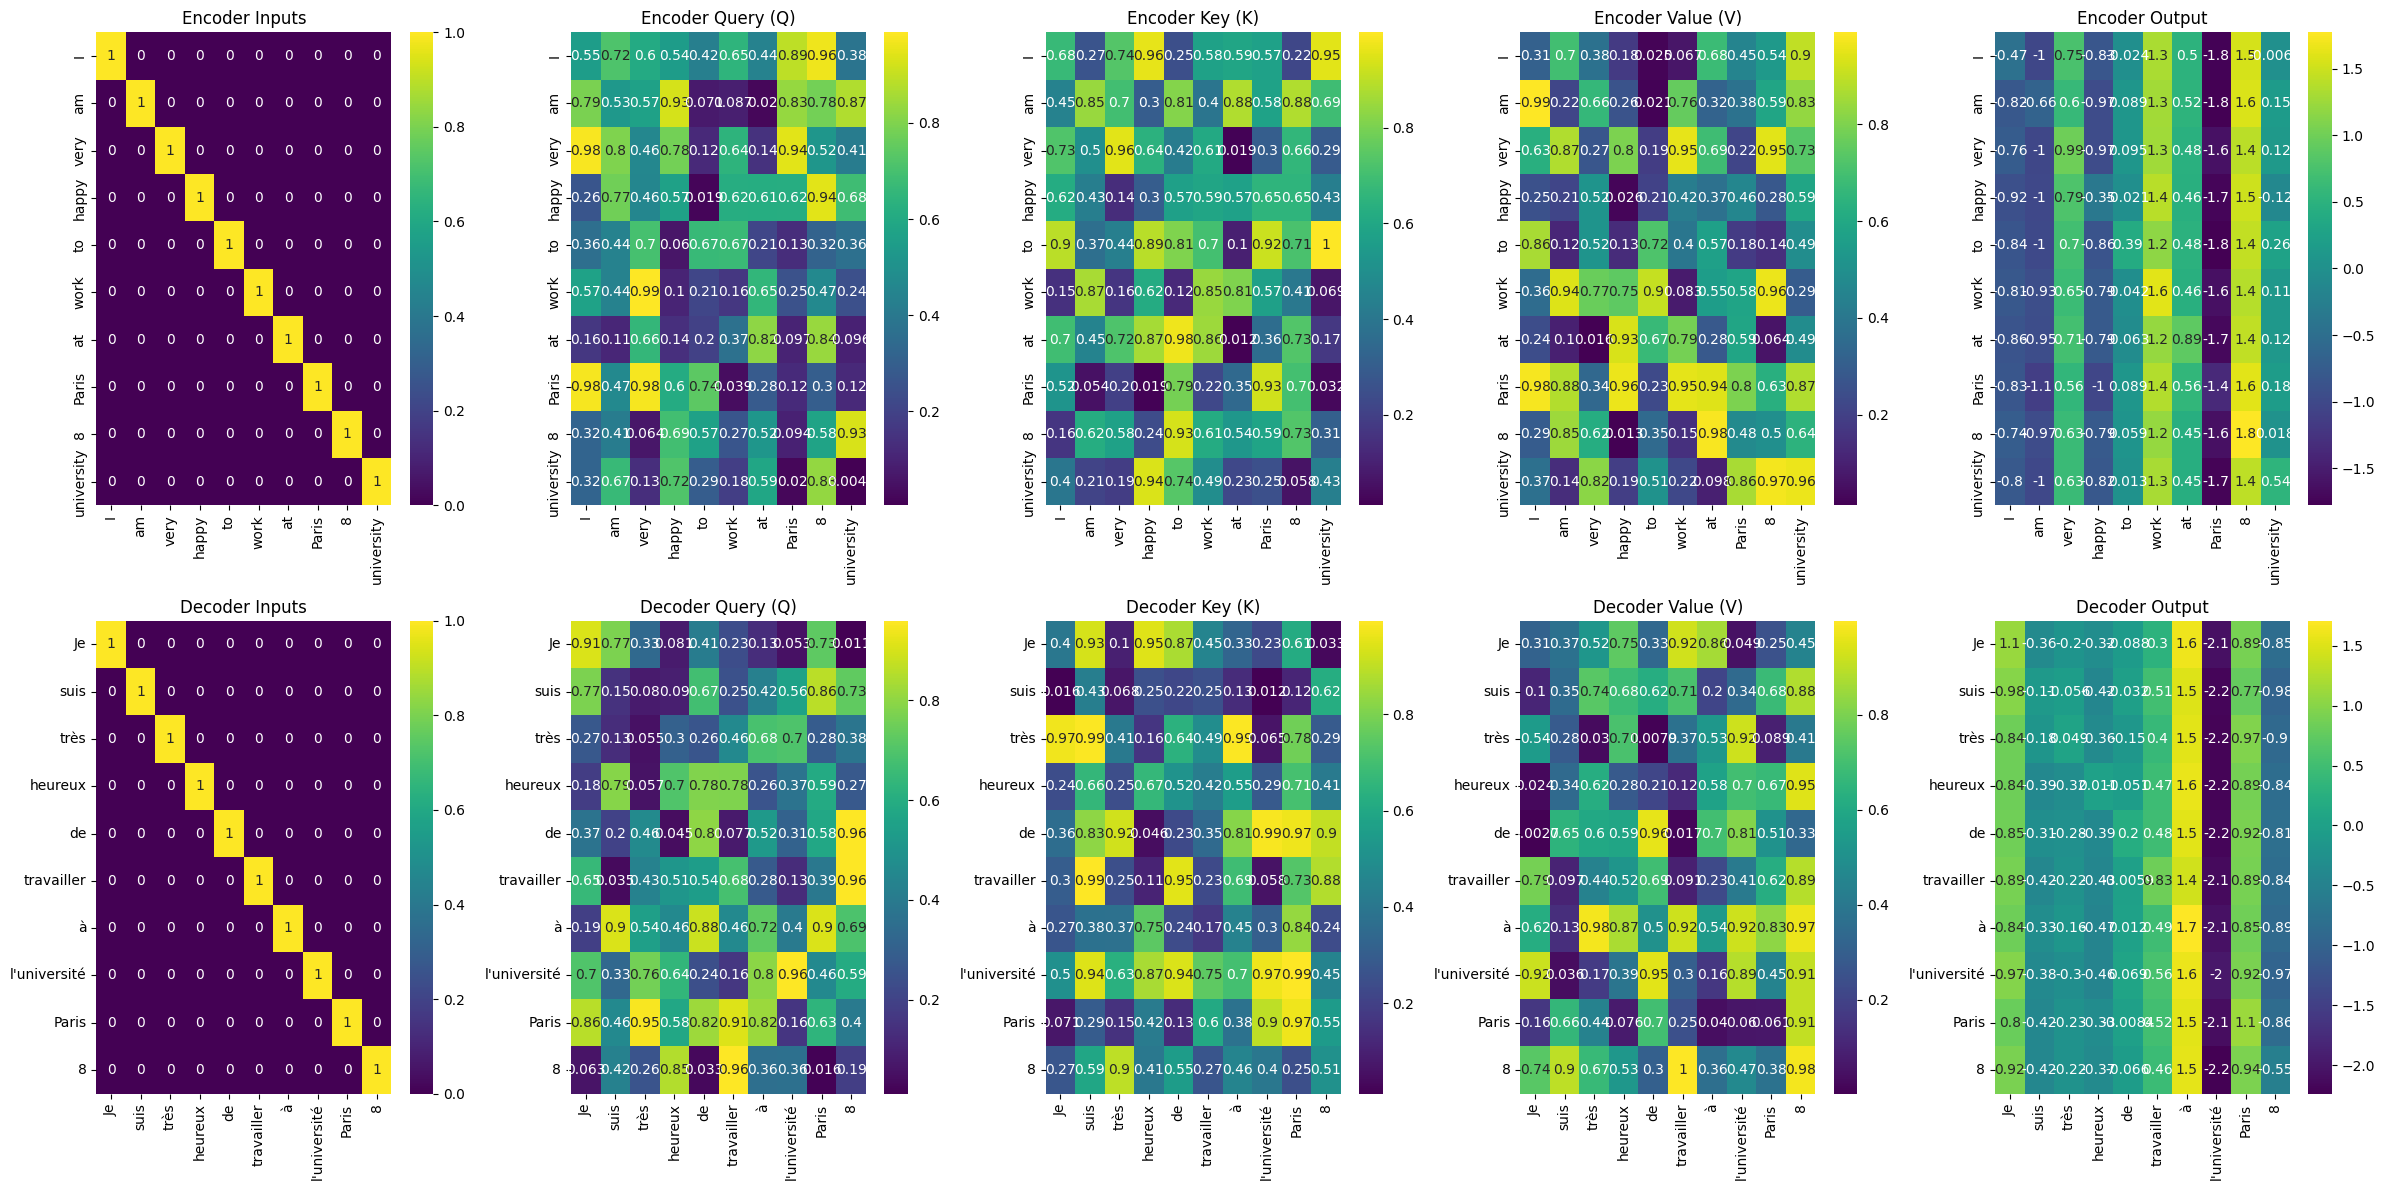

Encoder Sentence: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Encoder Inputs:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Encoder Query (Q):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Multi-head attention function
def multi_head_attention(Q, K, V, num_heads):
    d_model = Q.shape[-1] # Get the embedding dimension
    d_k = d_model // num_heads # Calculate the dimension of each head

    # Linear transformations for each head
    Q_heads = [np.dot(Q, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    K_heads = [np.dot(K, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    V_heads = [np.dot(V, np.random.rand(d_model, d_k)) for _ in range(num_heads)]

    attention_outputs = []
    for i in range(num_heads):
        scores = np.dot(Q_heads[i], K_heads[i].T) / np.sqrt(d_k)
        attention_weights = softmax(scores)
        attention_output = np.dot(attention_weights, V_heads[i])
        attention_outputs.append(attention_output)

    # Concatenate all the heads
    concatenated_output = np.concatenate(attention_outputs, axis=-1)

    # Linear transformation to map the concatenated output back to the original dimension
    output = np.dot(concatenated_output, np.random.rand(concatenated_output.shape[-1], d_model))
    return output

# Tokenize the sentences
encoder_sentence = "I am very happy to work at Paris 8 university".split()
decoder_sentence = "Je suis très heureux de travailler à l'université Paris 8".split()

# Vocabulary sizes
encoder_vocab_size = len(encoder_sentence)
decoder_vocab_size = len(decoder_sentence)

# Create one-hot embeddings for each word
encoder_word_to_index = {word: idx for idx, word in enumerate(encoder_sentence)}
decoder_word_to_index = {word: idx for idx, word in enumerate(decoder_sentence)}
encoder_embeddings = np.eye(encoder_vocab_size)
decoder_embeddings = np.eye(decoder_vocab_size)

# Convert sentences to sequences of embeddings
encoder_inputs = np.array([encoder_embeddings[encoder_word_to_index[word]] for word in encoder_sentence])
decoder_inputs = np.array([decoder_embeddings[decoder_word_to_index[word]] for word in decoder_sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
num_heads = 4
np.random.seed(0)
Wq_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wk_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wv_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)

Wq_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wk_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wv_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)

W1_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 1 weights for encoder
W2_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 2 weights for encoder

W1_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 1 weights for decoder
W2_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 2 weights for decoder

# Encoder Multi-Head Self-Attention Layer
Q_encoder = np.dot(encoder_inputs, Wq_encoder)
K_encoder = np.dot(encoder_inputs, Wk_encoder)
V_encoder = np.dot(encoder_inputs, Wv_encoder)

attention_output_encoder = multi_head_attention(Q_encoder, K_encoder, V_encoder, num_heads)

# Add & Norm Layer (Encoder Self-Attention Output + Inputs)
attention_output_encoder = layer_norm(attention_output_encoder + encoder_inputs)

# Encoder Feed-Forward Layer
ffn_output_encoder = np.dot(attention_output_encoder, W1_encoder)
ffn_output_encoder = np.maximum(0, ffn_output_encoder)  # ReLU activation
ffn_output_encoder = np.dot(ffn_output_encoder, W2_encoder)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output_encoder + attention_output_encoder)

# Decoder Multi-Head Self-Attention Layer
Q_decoder = np.dot(decoder_inputs, Wq_decoder)
K_decoder = np.dot(decoder_inputs, Wk_decoder)
V_decoder = np.dot(decoder_inputs, Wv_decoder)

attention_output_decoder = multi_head_attention(Q_decoder, K_decoder, V_decoder, num_heads)

# Add & Norm Layer (Decoder Self-Attention Output + Inputs)
attention_output_decoder = layer_norm(attention_output_decoder + decoder_inputs)

# Decoder Cross-Attention Layer (using encoder outputs)
Q_cross = np.dot(attention_output_decoder, Wq_decoder)
K_cross = np.dot(encoder_output, Wk_encoder)
V_cross = np.dot(encoder_output, Wv_encoder)

cross_attention_output = multi_head_attention(Q_cross, K_cross, V_cross, num_heads)

# Add & Norm Layer (Cross-Attention Output + Decoder Self-Attention Output)
cross_attention_output = layer_norm(cross_attention_output + attention_output_decoder)

# Decoder Feed-Forward Layer
ffn_output_decoder = np.dot(cross_attention_output, W1_decoder)
ffn_output_decoder = np.maximum(0, ffn_output_decoder)  # ReLU activation
ffn_output_decoder = np.dot(ffn_output_decoder, W2_decoder)

# Add & Norm Layer (Feed-Forward Output + Cross-Attention Output)
decoder_output = layer_norm(ffn_output_decoder + cross_attention_output)

# Visualization
plt.figure(figsize=(24, 12))

# Plotting the encoder inputs
plt.subplot(2, 5, 1)
sns.heatmap(encoder_inputs, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Inputs')

# Plotting encoder Query (Q) matrix
plt.subplot(2, 5, 2)
sns.heatmap(Q_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Query (Q)')

# Plotting encoder Key (K) matrix
plt.subplot(2, 5, 3)
sns.heatmap(K_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Key (K)')

# Plotting encoder Value (V) matrix
plt.subplot(2, 5, 4)
sns.heatmap(V_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Value (V)')

# Plotting encoder output
plt.subplot(2, 5, 5)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Output')

# Plotting the decoder inputs
plt.subplot(2, 5, 6)
sns.heatmap(decoder_inputs, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Inputs')

# Plotting decoder Query (Q) matrix
plt.subplot(2, 5, 7)
sns.heatmap(Q_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Query (Q)')

# Plotting decoder Key (K) matrix
plt.subplot(2, 5, 8)
sns.heatmap(K_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Key (K)')

# Plotting decoder Value (V) matrix
plt.subplot(2, 5, 9)
sns.heatmap(V_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Value (V)')

# Plotting decoder output
plt.subplot(2, 5, 10)
sns.heatmap(decoder_output, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Output')

plt.tight_layout()
plt.show()

print("Encoder Sentence:", encoder_sentence)
print("\nEncoder Inputs:\n", encoder_inputs)
print("\nEncoder Query (Q):\n", Q_encoder)
print("\nEncoder Key (K):\n", K_encoder)
print("\nEncoder Value (V):\n", V_encoder)
print("\nEncoder Output:\n", encoder_output)

print("\nDecoder Sentence:", decoder_sentence)
print("\nDecoder Inputs:\n", decoder_inputs)
print("\nDecoder Query (Q):\n", Q_decoder)
print("\nDecoder Key (K):\n", K_decoder)
print("\nDecoder Value (V):\n", V_decoder)
print("\nDecoder Output:\n", decoder_output)

## **Exercice 1 :** Self-Attention mechanism: basic implementation

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#visualiser une matrice
def plot_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Dimension')
    plt.ylabel('Dimension')
    plt.show()

In [8]:
# =============================
# 1. Séquence d'entrée modifiée
# =============================
# Ajout d'une dimension supplémentaire
# Avant c'était chaque élement etait un vecteur de 3D maintenant de 2D

input_sequence = np.array([
    [[1, 0, 1, 0],
     [0, 1, 0, 1]],

    [[0, 2, 1, 0],
     [1, 0, 0, 1]],

    [[1, 1, 0, 1],
     [0, 0, 1, 1]]
    ], dtype=float)

print("Nouvelle séquence d'entrée shape : ", input_sequence.shape)

Nouvelle séquence d'entrée shape :  (3, 2, 4)


In [9]:
# 2. Attention single head
#parametres du modèle
d_model = input_sequence.shape[-1]  #dimensions des embendiings
num_heads = 1  #nombre de attention head (1)

In [10]:
# créer les matrices query, key et value en utilisant des transformations linéaires (Dense layers)
query = tf.keras.layers.Dense(d_model)(input_sequence)
key = tf.keras.layers.Dense(d_model)(input_sequence)
value = tf.keras.layers.Dense(d_model)(input_sequence)

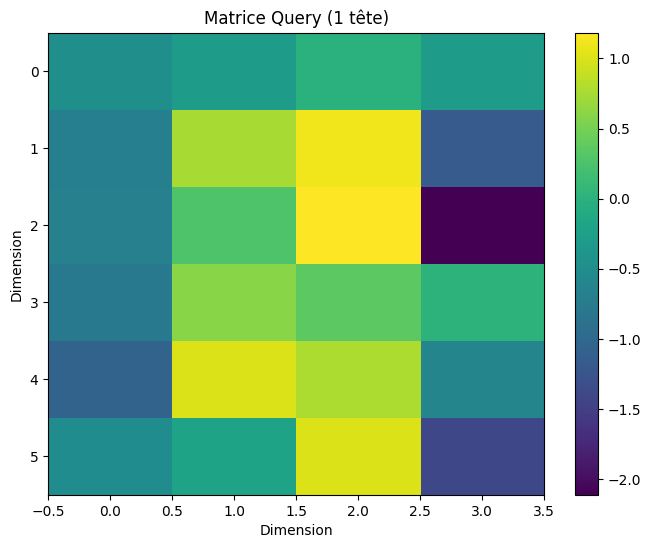

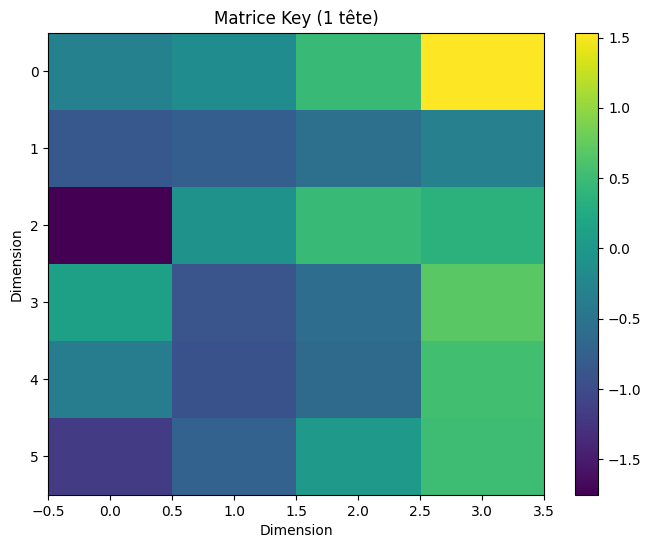

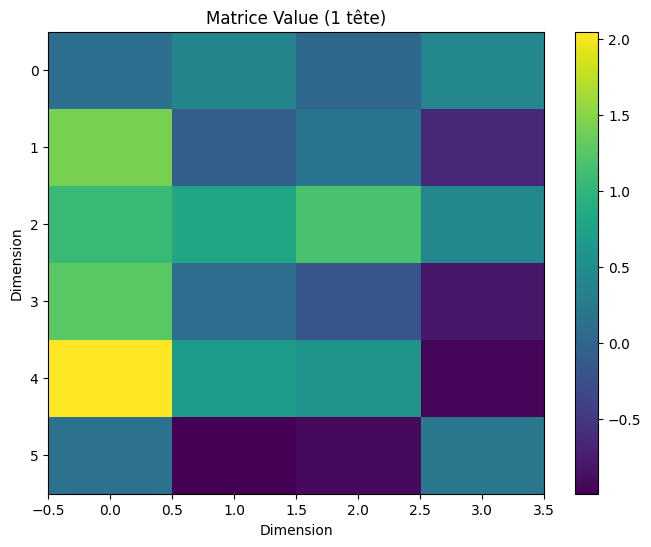

In [11]:
#Visualisation
# J'ai rajouté .reshape(-1, d_model) pour aplatir le tenseur 3D en une matrice 2D
plot_matrix(query.numpy().reshape(-1, d_model), "Matrice Query (1 tête)")
plot_matrix(key.numpy().reshape(-1, d_model), "Matrice Key (1 tête)")
plot_matrix(value.numpy().reshape(-1, d_model), "Matrice Value (1 tête)")

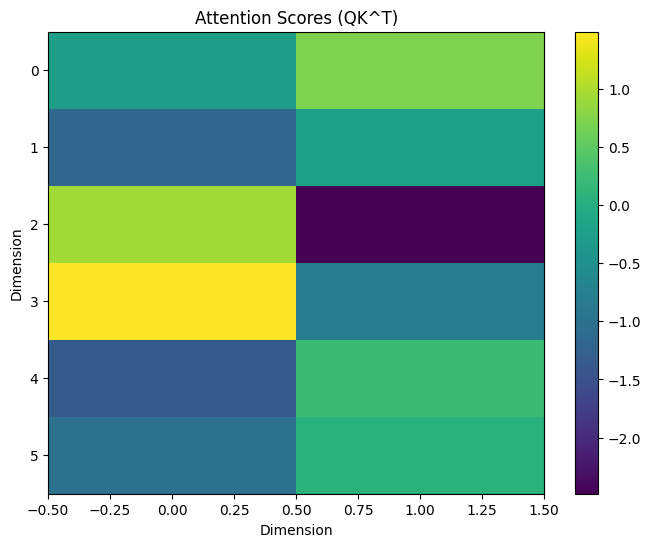

In [12]:
#Calcul des scores (QK^T)
scores = tf.matmul(query, key, transpose_b=True)
plot_matrix(scores.numpy().reshape(scores.shape[0]*scores.shape[1], -1), "Attention Scores (QK^T)")

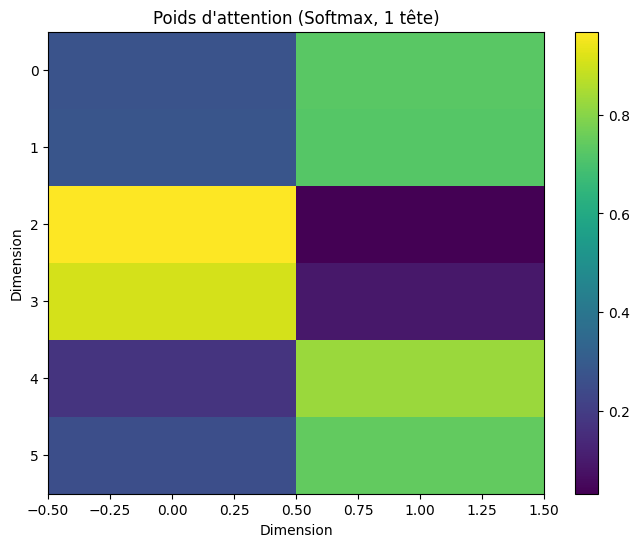

In [13]:
#Softmax
attention_weights = tf.nn.softmax(scores, axis=-1)
plot_matrix(attention_weights.numpy().reshape(attention_weights.shape[0]*attention_weights.shape[1], -1),
            "Poids d'attention (Softmax, 1 tête)")

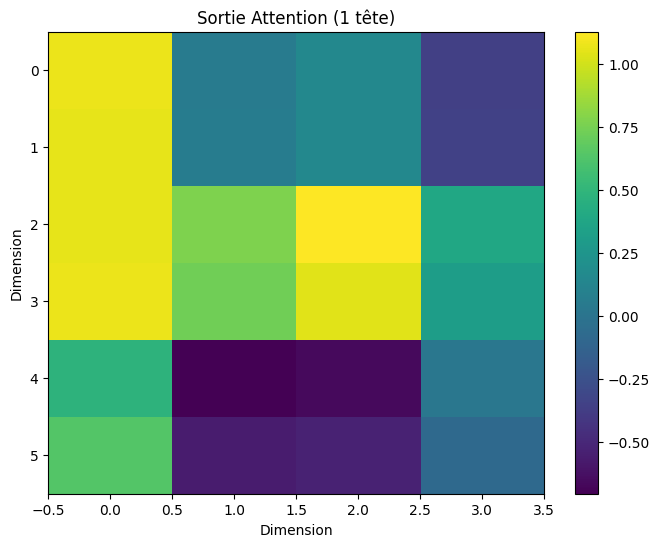

In [14]:
#Sortie attention
attention_output = tf.matmul(attention_weights, value)
plot_matrix(attention_output.numpy().reshape(-1, d_model), "Sortie Attention (1 tête)")

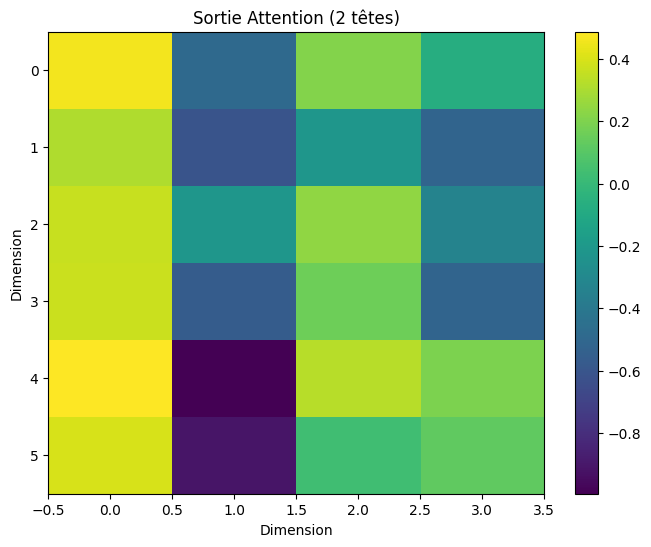


=== Scaling factor = 1.0 ===


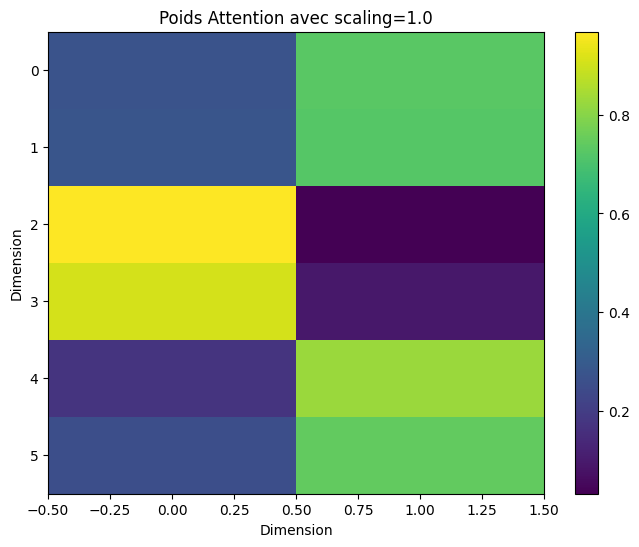

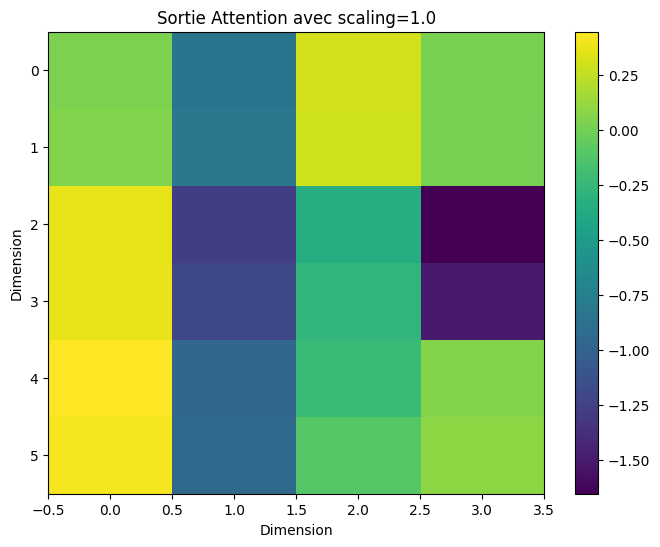


=== Scaling factor = 0.5 ===


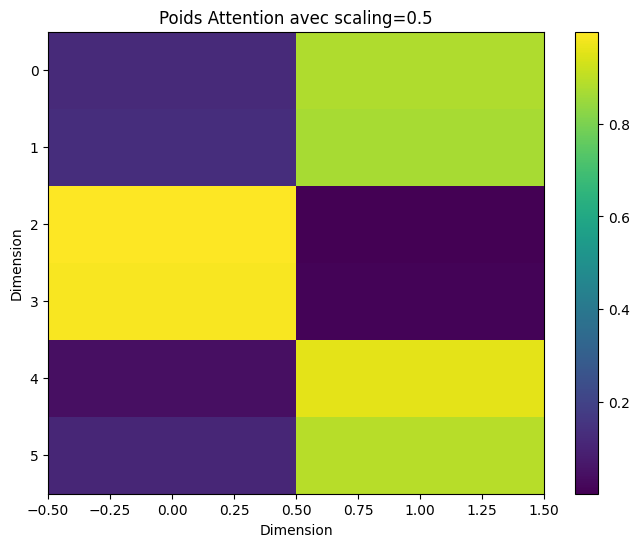

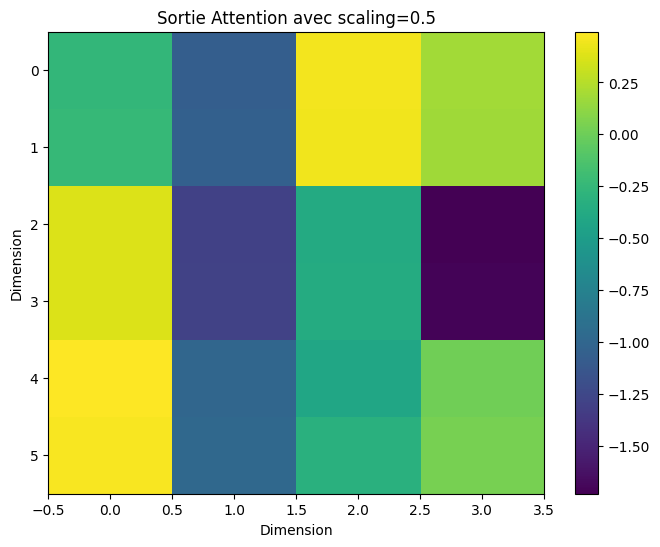


=== Scaling factor = 2.0 ===


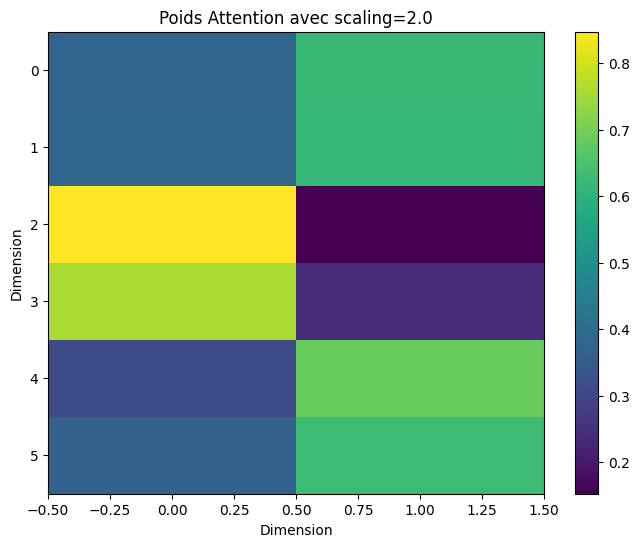

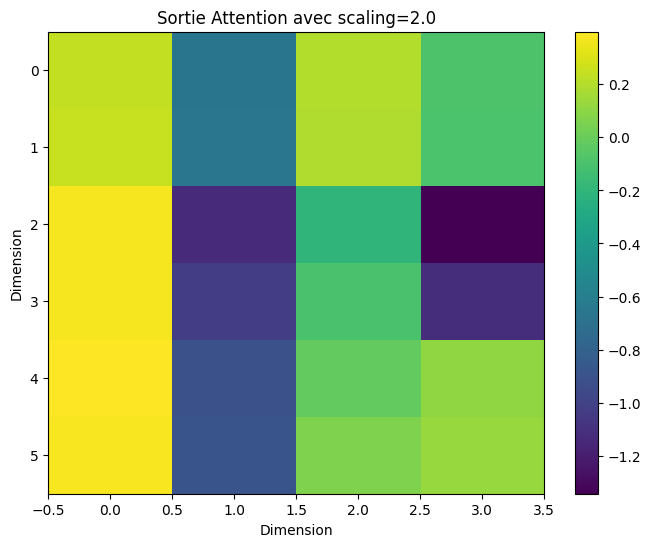

In [15]:
# ==========================
# 3. Multi-head Attention (2 têtes)
# ==========================
num_heads = 2
depth = d_model // num_heads  #dimension par tête

#fonction pour découper en plusieurs têtes
def split_heads(x, num_heads):
    """Découpe la dernière dimension en plusieurs têtes"""
    batch_size = tf.shape(x)[0]
    seq_len = tf.shape(x)[1]
    depth = x.shape[-1] // num_heads
    x = tf.reshape(x, (batch_size, seq_len, num_heads, depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])  # (batch, heads, seq_len, depth)

#Q, K, V
# créer les matrices query, key et value en utilisant des transformations linéaires (Dense layers)
query = tf.keras.layers.Dense(d_model)(input_sequence)
key = tf.keras.layers.Dense(d_model)(input_sequence)
value = tf.keras.layers.Dense(d_model)(input_sequence)

query_heads = split_heads(query, num_heads)
key_heads = split_heads(key, num_heads)
value_heads = split_heads(value, num_heads)

#calculer scores multi-têtes
scores_multi = tf.matmul(query_heads, key_heads, transpose_b=True)

#Softmax multi-head
attention_weights_multi = tf.nn.softmax(scores_multi, axis=-1)

#Sortie multi-head
attention_output_multi = tf.matmul(attention_weights_multi, value_heads)

#Recombinaison des têtes
attention_output_multi = tf.transpose(attention_output_multi, perm=[0, 2, 1, 3])  # (batch, seq_len, heads, depth)
attention_output_multi = tf.reshape(attention_output_multi, (tf.shape(input_sequence)[0], -1, d_model))

plot_matrix(attention_output_multi.numpy().reshape(-1, d_model), "Sortie Attention (2 têtes)")

# ==========================
# 4. Expérimenter avec différents facteurs de scaling
# ==========================
scaling_factors = [1.0, 0.5, 2.0]  # pas de scaling, division par 2, multiplication par 2
for scale in scaling_factors:
    print(f"\n=== Scaling factor = {scale} ===")
    scaled_scores = scores / scale
    attention_weights_scaled = tf.nn.softmax(scaled_scores, axis=-1)
    attention_output_scaled = tf.matmul(attention_weights_scaled, value)

    plot_matrix(attention_weights_scaled.numpy().reshape(-1, attention_weights_scaled.shape[-1]),
                f"Poids Attention avec scaling={scale}")
    plot_matrix(attention_output_scaled.numpy().reshape(-1, d_model),
                f"Sortie Attention avec scaling={scale}")

## **Exercice 2 :** Self-Attention mechanism: Using a sentence as input

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#fonction softmax
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

In [18]:
# ====================
# 1. Nouvelle phrase
# ====================

sentence = ["I", "love", "playing", "tennis", "every", "day", "PAD"]
# PAD pour le masking, pour ignorer les tokens de padding qui sera appliqué aux scores avant softmax


In [19]:
#Exemple d'embeddings simples ( chaque mot = vecteur de dimension 3)

embeddings = {
        "I": [1, 0, 1],
    "love": [0, 1, 0],
    "playing": [1, 1, 0],
    "tennis": [1, 1, 1],
    "every": [0, 0, 1],
    "day": [1, 0, 0],
    "PAD": [0, 0, 0] # token de padding
}

In [20]:
#conversion de la phrase en sequence d'embeddings (vecteurs)
inputs = np.array([embeddings[word] for word in sentence])

In [21]:
# ========================
# 2. Initialisation des poids
# ========================
np.random.seed(0)
Wq = np.random.rand(3, 3)
Wk = np.random.rand(3, 3)
Wv = np.random.rand(3, 3)

In [22]:
# ===========================
# 3. Calcul Query, Key, Value
# ===========================
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

In [23]:
# ========================
# 4. Scores et masquage
# ========================
scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])  #scores d'attention

# Masque (1 pour PAD → très grand nombre négatif dans les scores pour l'exclure)
mask = np.array([1 if word == "PAD" else 0 for word in sentence])
mask_matrix = np.tile(mask, (len(sentence), 1))  #répété sur chaque ligne

#appliquer le masque : valeurs très négatives sur les positions PAD
masked_scores = scores.copy()
masked_scores[mask_matrix == 1] = -1e9

#poids sans masque
attention_weights = softmax(scores)
#poids avec masque
attention_weights_masked = softmax(masked_scores)

In [24]:
# ========================
# 5. Sorties
# ========================
output = np.dot(attention_weights, V)
output_masked = np.dot(attention_weights_masked, V)

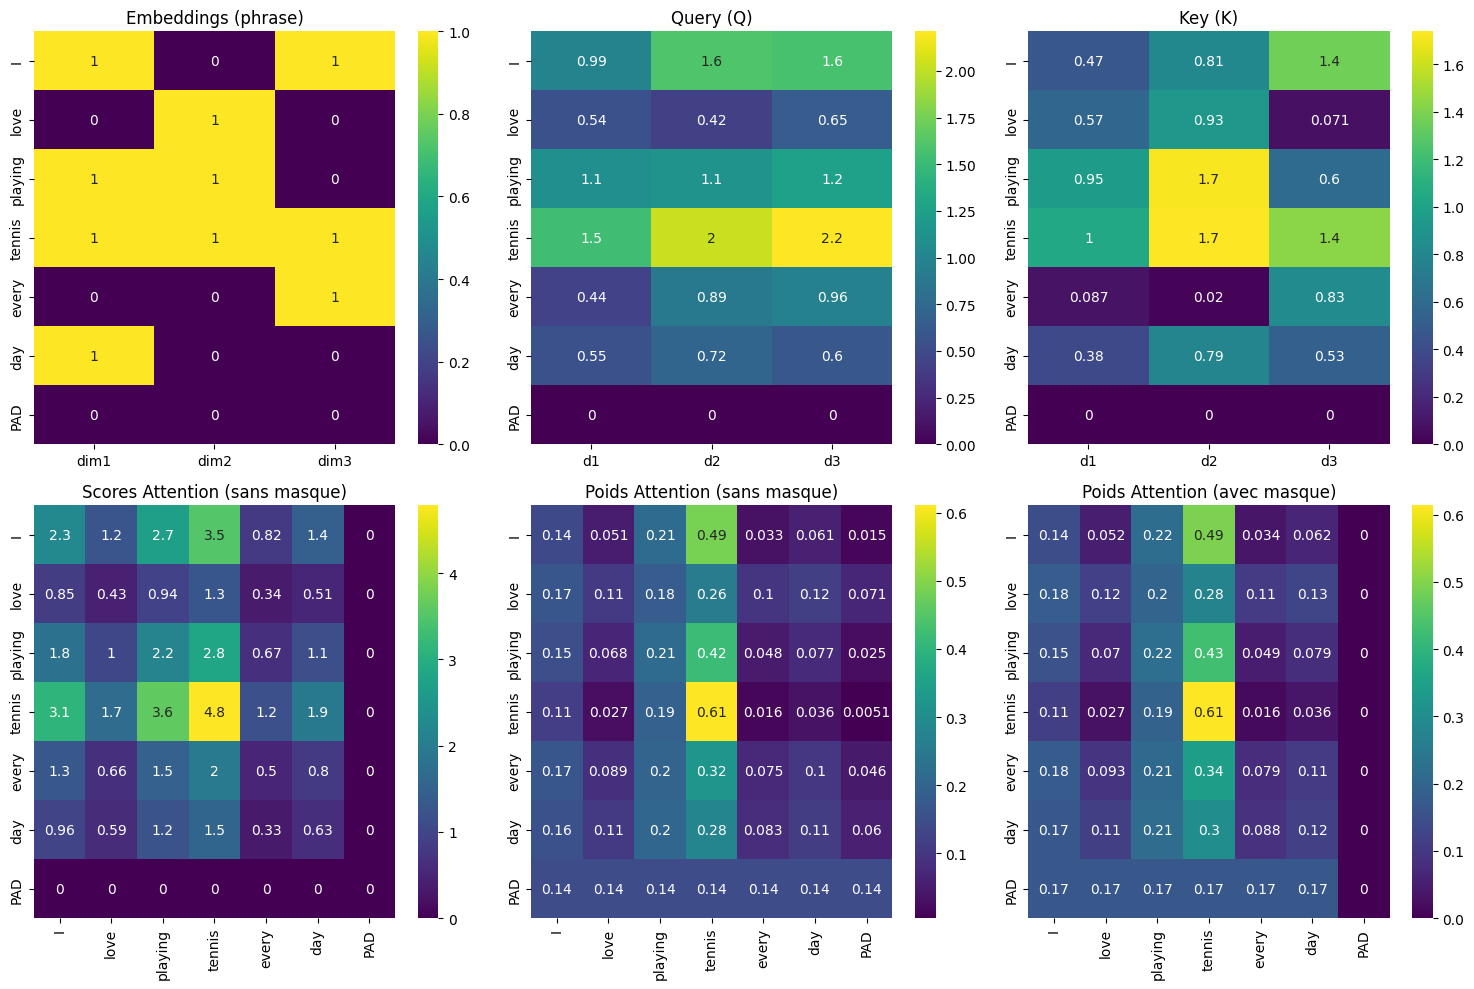

In [25]:
# ========================
# 6. Visualisations
# ========================
plt.figure(figsize=(15, 10))

#entrées
plt.subplot(2, 3, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=["dim1","dim2","dim3"], yticklabels=sentence)
plt.title("Embeddings (phrase)")

#Query
plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=['d1', 'd2', 'd3'], yticklabels=sentence)
plt.title("Query (Q)")

#Key
plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=['d1', 'd2', 'd3'], yticklabels=sentence)
plt.title("Key (K)")

#scores bruts
plt.subplot(2, 3, 4)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title("Scores Attention (sans masque)")

#poids d'attention sans masque
plt.subplot(2, 3, 5)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title("Poids Attention (sans masque)")

#poids d'attention avec masque
plt.subplot(2, 3, 6)
sns.heatmap(attention_weights_masked, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title("Poids Attention (avec masque)")

plt.tight_layout()
plt.show()

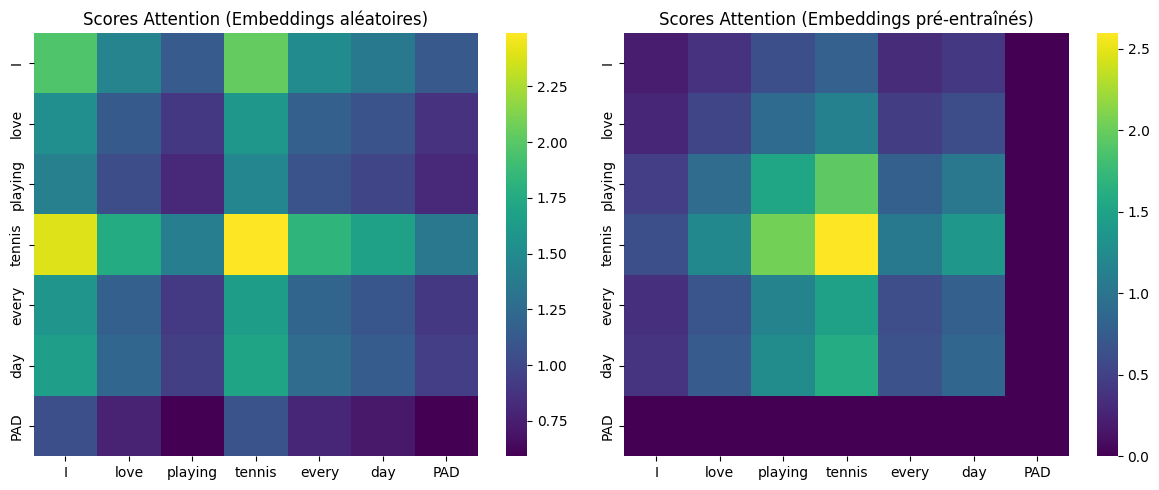

In [26]:
# ==========================================
# 7. Expérimenter avec embeddings différents
# ==========================================

# a)initialisation aleatoire
random_embeddings = {word: np.random.rand(3) for word in sentence}
inputs_random = np.array([random_embeddings[word] for word in sentence])
Q_r = np.dot(inputs_random, Wq)
K_r = np.dot(inputs_random, Wk)
V_r = np.dot(inputs_random, Wv)
scores_r = np.dot(Q_r, K_r.T) / np.sqrt(K_r.shape[1])

# b)simulation des embeddings pré-entraînés (comme GloVe)
#mais ici juste des valeurs illustrées
pretrained_embeddings = {
    "I": [0.2, 0.1, 0.3],
    "love": [0.4, 0.5, 0.1],
    "playing": [0.7, 0.8, 0.2],
    "tennis": [0.9, 0.9, 0.4],
    "every": [0.1, 0.3, 0.7],
    "day": [0.2, 0.6, 0.5],
    "PAD": [0, 0, 0]
}
inputs_pretrained = np.array([pretrained_embeddings[word] for word in sentence])
Q_p = np.dot(inputs_pretrained, Wq)
K_p = np.dot(inputs_pretrained, Wk)
V_p = np.dot(inputs_pretrained, Wv)
scores_p = np.dot(Q_p, K_p.T) / np.sqrt(K_p.shape[1])

# comparaison visuelle
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(scores_r, annot=False, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title("Scores Attention (Embeddings aléatoires)")

plt.subplot(1, 2, 2)
sns.heatmap(scores_p, annot=False, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title("Scores Attention (Embeddings pré-entraînés)")

plt.tight_layout()
plt.show()

In [27]:
# ========================
# Impression des résultats
# ========================o
print("Phrase:", sentence)
print("\nAttention Weights (sans masque):\n", attention_weights)
print("\nAttention Weights (avec masque):\n", attention_weights_masked)
print("\nOutput (sans masque):\n", output)
print("\nOutput (avec masque):\n", output_masked)

Phrase: ['I', 'love', 'playing', 'tennis', 'every', 'day', 'PAD']

Attention Weights (sans masque):
 [[0.13971382 0.05108413 0.2137293  0.48594253 0.03339345 0.06144952
  0.01468725]
 [0.16604041 0.10879505 0.18144898 0.25565264 0.09955622 0.11784687
  0.07065984]
 [0.15073326 0.06813336 0.21388648 0.41738246 0.04801595 0.07724284
  0.02460564]
 [0.11406682 0.02732759 0.19068861 0.61085954 0.01634692 0.0356076
  0.00510293]
 [0.16735714 0.08870242 0.19716754 0.32366905 0.07529121 0.10194795
  0.0458647 ]
 [0.15567556 0.10739296 0.20214078 0.27996842 0.08270701 0.11239974
  0.05971552]
 [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.14285714]]

Attention Weights (avec masque):
 [[0.14179642 0.0518456  0.21691519 0.49318608 0.03389122 0.0623655
  0.        ]
 [0.17866484 0.11706698 0.19524496 0.27509049 0.1071257  0.12680703
  0.        ]
 [0.15453571 0.06985212 0.21928206 0.4279115  0.04922722 0.0791914
  0.        ]
 [0.11465188 0.02746775 0.19166668 0.6139927  

## **Exercice 3 :** Self-Attention mechanism: Compute word embeddings

In [1]:
!pip install gensim

Embeddings Word2Vec générés pour chaque mot.

Encodage positionnel ajouté aux embeddings.



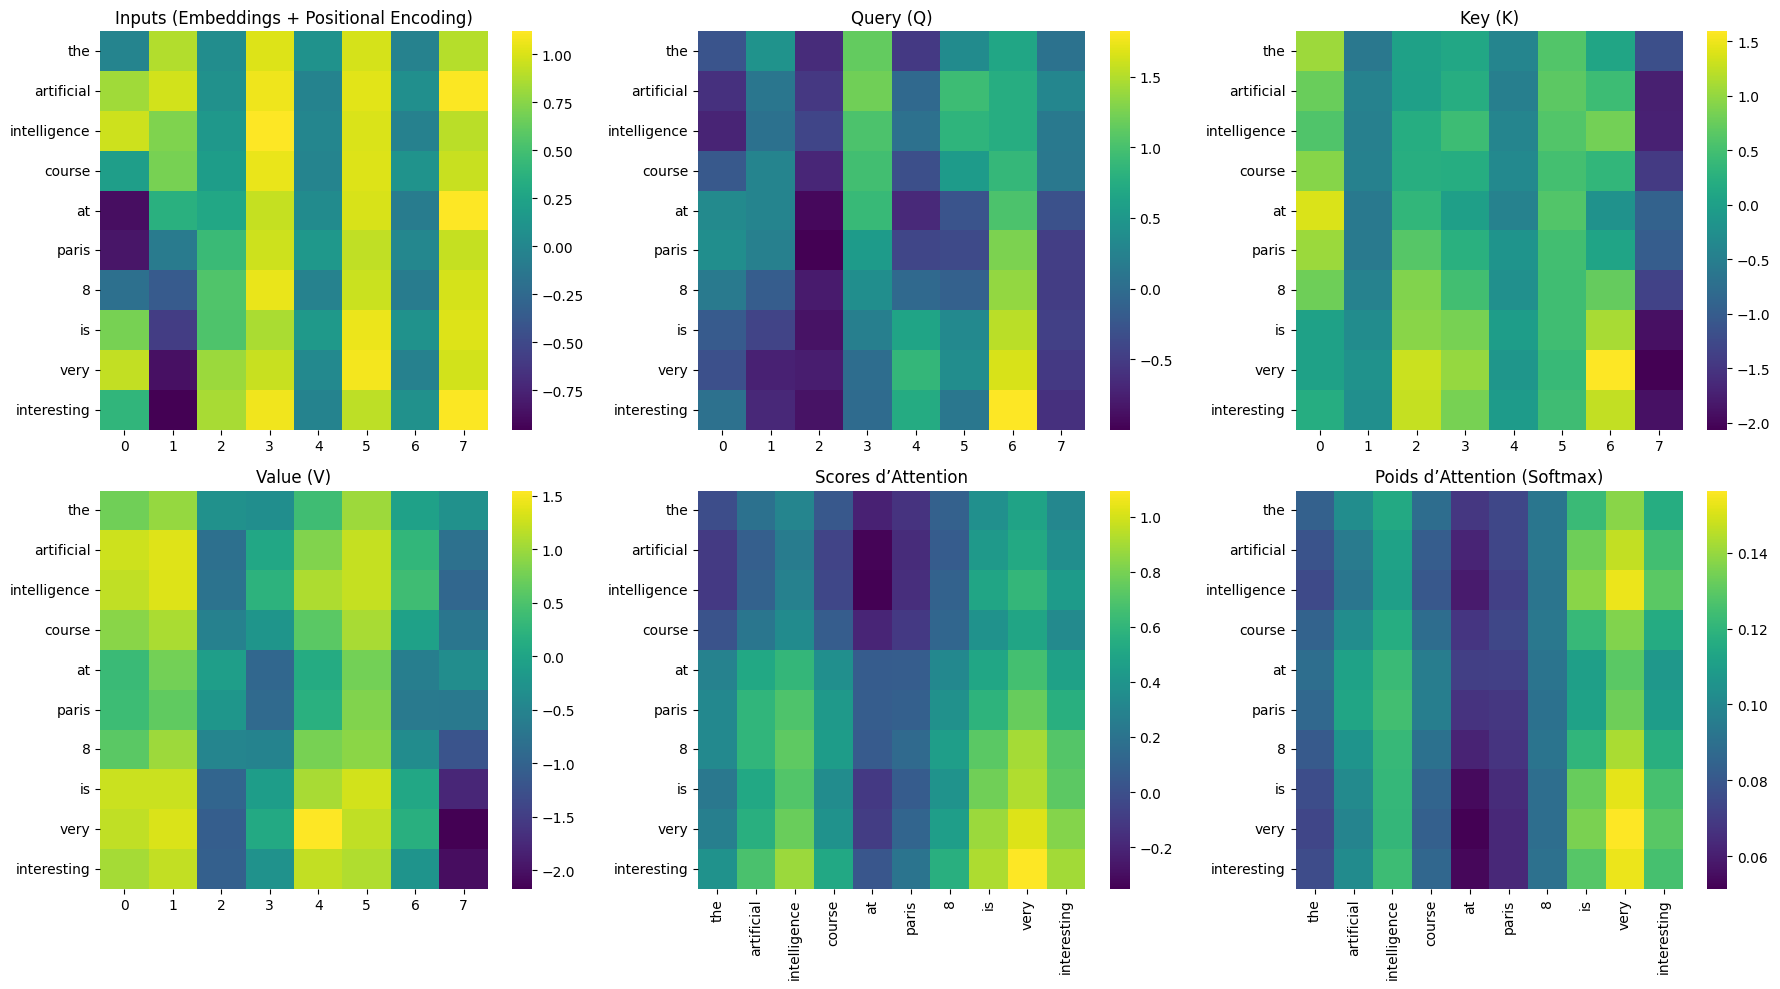

Phrase : ['the', 'artificial', 'intelligence', 'course', 'at', 'paris', '8', 'is', 'very', 'interesting']

 Query (Q):
 [[-0.26064045  0.45168517 -0.64571527  1.14660922 -0.53307785  0.35416701
   0.67449512  0.07003986]
 [-0.60850786  0.10332292 -0.53773496  1.20735787 -0.04394955  0.9310989
   0.75276319  0.29091264]
 [-0.71546512  0.04881172 -0.41910272  1.02310279  0.04446352  0.83662222
   0.76218065  0.14618155]
 [-0.22456026  0.26949099 -0.69045832  0.9668079  -0.31856976  0.54063319
   0.87723641  0.13206582]
 [ 0.34129316  0.27912575 -0.93170374  0.898482   -0.67023904 -0.26462499
   1.02300061 -0.29334392]
 [ 0.38035993  0.22402152 -0.99742006  0.54346492 -0.41213509 -0.36796527
   1.26853928 -0.48063128]
 [ 0.15697939 -0.1816627  -0.78855245  0.38107598 -0.04864157 -0.13408425
   1.36594139 -0.49222926]
 [-0.20318074 -0.42964181 -0.85517946  0.21281138  0.65090462  0.32445231
   1.53338466 -0.45892477]
 [-0.30596201 -0.74018813 -0.77217882 -0.00554993  0.86637404  0.37504034

In [2]:
# Avec Word2Vec, Xavier et Positionnal Encoding
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

#========================
#1. préparation : phrase et embeddings avec Word2Vec
#========================

#phrase d’exemple (tu peux la changer)
sentence = "The artificial intelligence course at Paris 8 is very interesting".lower().split()

#entraînement d’un petit modèle Word2Vec
#(chaque mot sera représenté par un vecteur de taille 8)
model = Word2Vec([sentence], vector_size=8, min_count=1, epochs=100)

#extraction des vecteurs d’embeddings pour chaque mot
embeddings = np.array([model.wv[word] for word in sentence])

print("Embeddings Word2Vec générés pour chaque mot.\n")


#========================
#2. initialisation Xavier des matrices de poids
#========================

def xavier_init(fan_in, fan_out):
    """Initialisation Xavier uniforme"""
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

#poids pour Query, Key et Value
d_model = embeddings.shape[1]  #dimension des vecteurs
Wq = xavier_init(d_model, d_model)
Wk = xavier_init(d_model, d_model)
Wv = xavier_init(d_model, d_model)

#========================
# 3. positional Encoding (encodage de position)
#========================

def positional_encoding(position, d_model):
    """Encodage positionnel sinusoïdal comme dans Transformer"""
    PE = np.zeros((position, d_model))
    for pos in range(position):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((i + 1) / d_model)))
    return PE

#on crée un encodage positionnel de même taille que nos embeddings
pos_enc = positional_encoding(len(sentence), d_model)

#on ajoute l'encodage de position aux embeddings
inputs = embeddings + pos_enc

print("Encodage positionnel ajouté aux embeddings.\n")

#========================
#4. Calcul de Q, K, V (Query, Key, Value)
#========================

Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

#========================
#5. calcul des scores et poids d’attention
#========================

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

#ccores d’attention = similarité entre Q et K
scores = np.dot(Q, K.T) / np.sqrt(d_model)

#poids d’attention (après normalisation softmax)
attention_weights = softmax(scores)

#sortie finale du mécanisme d’attention
output = np.dot(attention_weights, V)

#========================
#Visualisation
#========================

plt.figure(figsize=(18, 10))

#entrée (embeddings + position)
plt.subplot(2, 3, 1)
sns.heatmap(inputs, cmap='viridis', xticklabels=range(d_model), yticklabels=sentence)
plt.title('Inputs (Embeddings + Positional Encoding)')

#query
plt.subplot(2, 3, 2)
sns.heatmap(Q, cmap='viridis', xticklabels=range(d_model), yticklabels=sentence)
plt.title('Query (Q)')

#key
plt.subplot(2, 3, 3)
sns.heatmap(K, cmap='viridis', xticklabels=range(d_model), yticklabels=sentence)
plt.title('Key (K)')

#value
plt.subplot(2, 3, 4)
sns.heatmap(V, cmap='viridis', xticklabels=range(d_model), yticklabels=sentence)
plt.title('Value (V)')

#scores d’attention
plt.subplot(2, 3, 5)
sns.heatmap(scores, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Scores d’Attention')

#poids d’attention
plt.subplot(2, 3, 6)
sns.heatmap(attention_weights, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Poids d’Attention (Softmax)')

plt.tight_layout()
plt.show()

#========================
#Affichage des résultats numériques
#========================

print("Phrase :", sentence)
print("\n Query (Q):\n", Q)
print("\n Key (K):\n", K)
print("\n Value (V):\n", V)
print("\n Scores d’attention:\n", scores)
print("\n Poids d’attention:\n", attention_weights)
print("\n Sortie finale (output):\n", output)


### **Exercice 4: Self-Attention mechanism: Varying Parameters**

Phrase : ['the', 'artificial', 'intelligence', 'course', 'at', 'paris', '8', 'is', 'very', 'interesting']


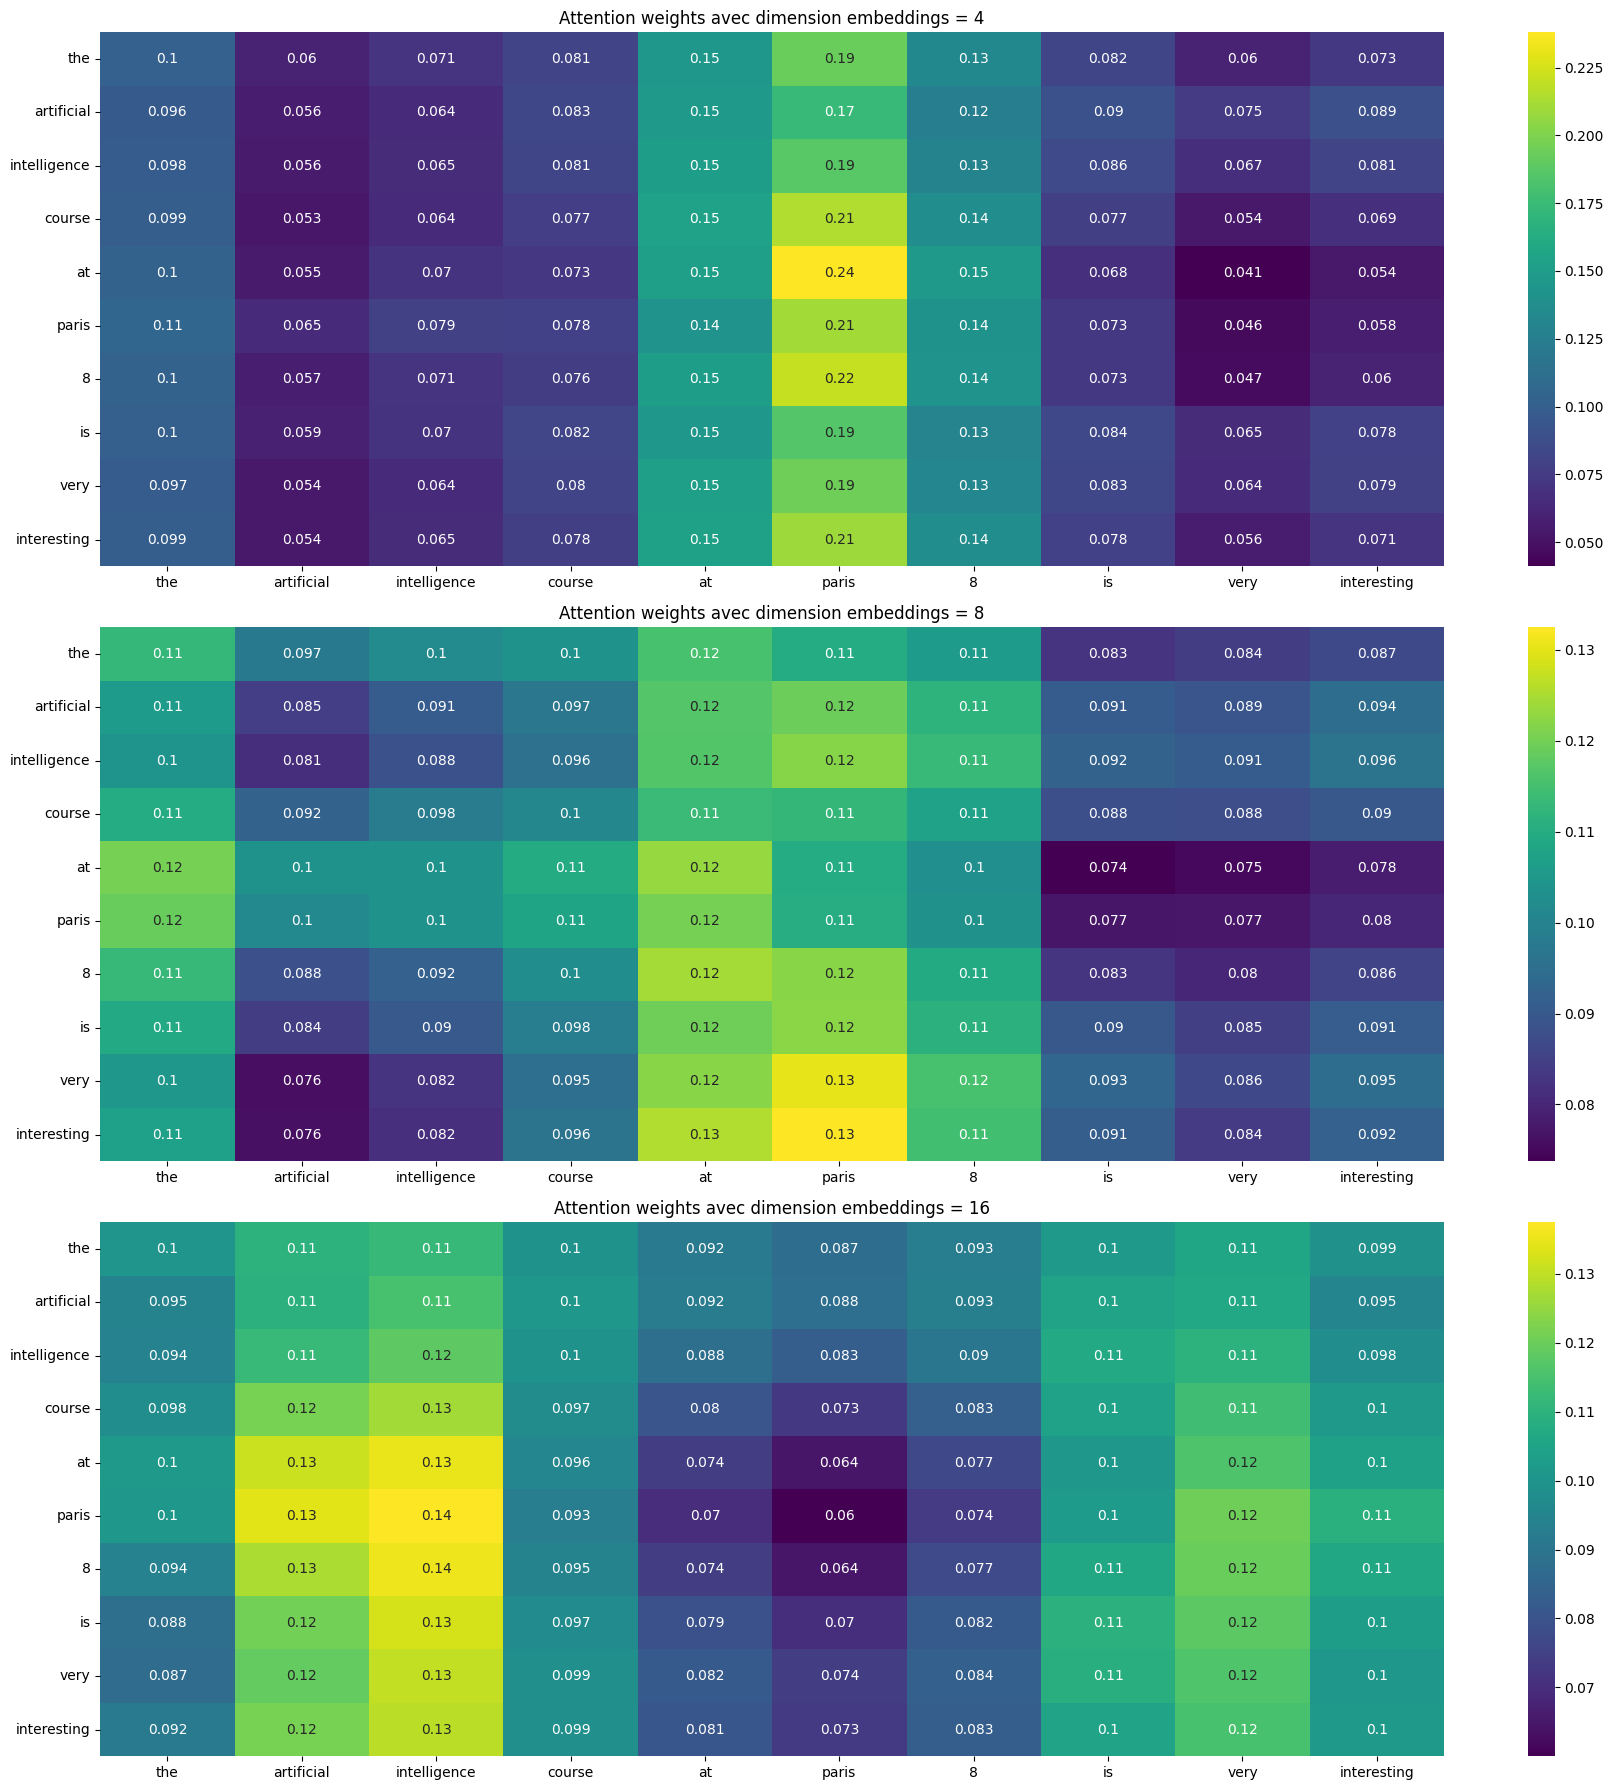


 Partie 1 traitée : comparaison des poids d'attention selon la dimension des embeddings.



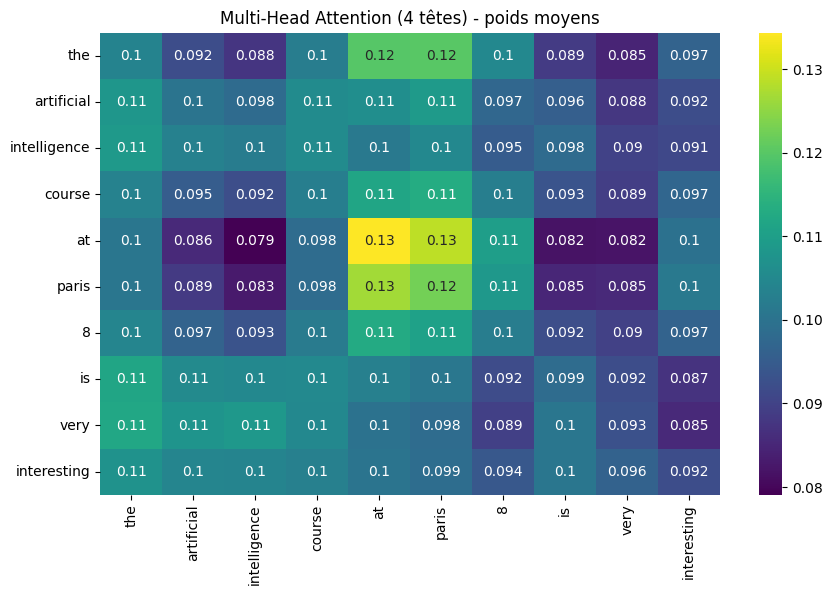

Partie 2 traitée : Multi-Head Attention avec 4 têtes.



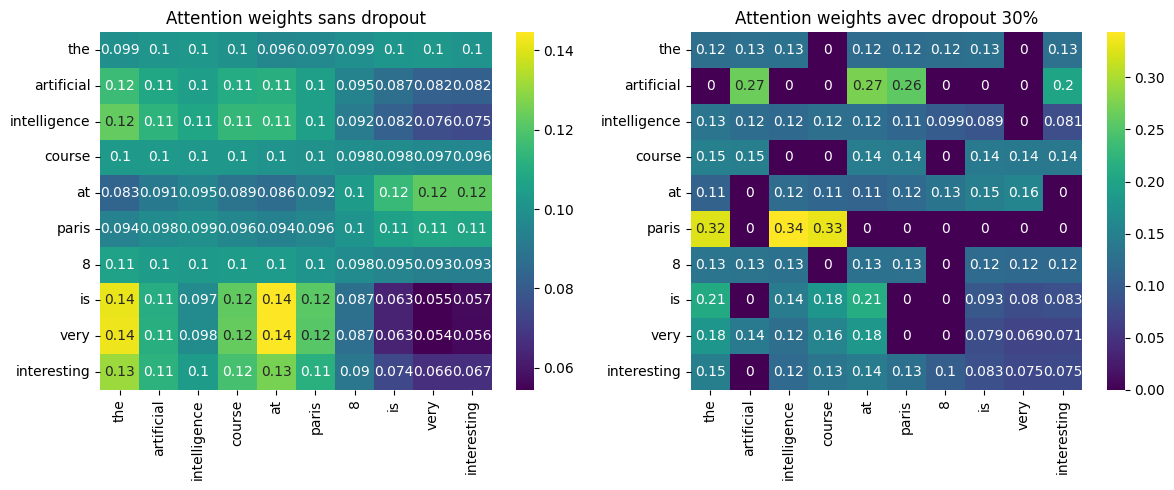

Partie 3 traitée : impact du dropout sur les poids d’attention.



In [3]:
# EXERCICE 4 : Self-Attention avec variations
# - Dimensions embeddings
# - Multi-Head Attention
# - Dropout

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

#========================
#fonctions à utiliser pendant l'exercice
#========================
def softmax(x):
    """Softmax pour les scores d'attention"""
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def xavier_init(fan_in, fan_out):
    """Initialisation Xavier"""
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

def positional_encoding(position, d_model):
    """Encodage positionnel sin/cos"""
    PE = np.zeros((position, d_model))
    for pos in range(position):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((i + 1) / d_model)))
    return PE

def self_attention(inputs, Wq, Wk, Wv, dropout_rate=0.0):
    """Calcul de la self-attention avec option dropout"""
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)
    scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])
    attention_weights = softmax(scores)

    #application du dropout sur les poids d'attention
    if dropout_rate > 0.0:
        mask = (np.random.rand(*attention_weights.shape) >= dropout_rate).astype(float)
        attention_weights *= mask
        attention_weights /= np.sum(attention_weights, axis=-1, keepdims=True)  # re-normalisation

    output = np.dot(attention_weights, V)
    return attention_weights, output


#========================
# 1. phrase et embeddings
#========================

sentence = "The artificial intelligence course at Paris 8 is very interesting".lower().split()
print("Phrase :", sentence)

# On va expérimenter avec différentes dimensions
embedding_dims = [4, 8, 16]

#========================
#2. effet de la dimension des embeddings
#========================
plt.figure(figsize=(18, 6*len(embedding_dims)))
for idx, dim in enumerate(embedding_dims):
    #entraînement Word2Vec pour la dimension actuelle
    model = Word2Vec([sentence], vector_size=dim, min_count=1, epochs=100)
    embeddings = np.array([model.wv[word] for word in sentence])

    #ajout de l'encodage positionnel
    inputs = embeddings + positional_encoding(len(sentence), dim)

    #initialisation Xavier pour Q, K, V
    Wq = xavier_init(dim, dim)
    Wk = xavier_init(dim, dim)
    Wv = xavier_init(dim, dim)

    #calcul self-attention
    att_weights, output = self_attention(inputs, Wq, Wk, Wv)

    #visualisation des poids d'attention
    plt.subplot(len(embedding_dims), 1, idx+1)
    sns.heatmap(att_weights, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True)
    plt.title(f'Attention weights avec dimension embeddings = {dim}')

plt.tight_layout()
plt.show()

print("\n Partie 1 traitée : comparaison des poids d'attention selon la dimension des embeddings.\n")

#========================
# 3. Multi-Head Attention (4 têtes)
#========================

num_heads = 4
dim_model = 8  #on va fixer ici 8 pour simplicité
model = Word2Vec([sentence], vector_size=dim_model, min_count=1, epochs=100)
embeddings = np.array([model.wv[word] for word in sentence])
inputs = embeddings + positional_encoding(len(sentence), dim_model)

#dimensions par tête
dim_per_head = dim_model // num_heads

#initialiser Xavier pour chaque tête
Ws = []
for _ in range(num_heads):
    Wq = xavier_init(dim_model, dim_per_head)
    Wk = xavier_init(dim_model, dim_per_head)
    Wv = xavier_init(dim_model, dim_per_head)
    Ws.append((Wq, Wk, Wv))

#calculer attention multi-head
multi_head_outputs = []
multi_head_att_weights = []
for Wq, Wk, Wv in Ws:
    att_weights, output = self_attention(inputs, Wq, Wk, Wv)
    multi_head_outputs.append(output)
    multi_head_att_weights.append(att_weights)

#concatiner les sorties des têtes
multi_head_output = np.concatenate(multi_head_outputs, axis=1)

#========================
# Visualisation (moyenne des poids pour simplifier)
#========================

avg_att_weights = np.mean(np.array(multi_head_att_weights), axis=0)
plt.figure(figsize=(10, 6))
sns.heatmap(avg_att_weights, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True)
plt.title('Multi-Head Attention (4 têtes) - poids moyens')
plt.show()

print("Partie 2 traitée : Multi-Head Attention avec 4 têtes.\n")

#========================
# 4. dropout sur les poids d’attention
#========================
dropout_rate = 0.3  # 30% de dropout
att_weights_no_dropout, output_no_dropout = self_attention(inputs, Ws[0][0], Ws[0][1], Ws[0][2], dropout_rate=0.0)
att_weights_dropout, output_dropout = self_attention(inputs, Ws[0][0], Ws[0][1], Ws[0][2], dropout_rate=dropout_rate)

#========================
# Visualisation
#========================

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(att_weights_no_dropout, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True)
plt.title('Attention weights sans dropout')

plt.subplot(1,2,2)
sns.heatmap(att_weights_dropout, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True)
plt.title(f'Attention weights avec dropout {dropout_rate*100:.0f}%')

plt.tight_layout()
plt.show()

print("Partie 3 traitée : impact du dropout sur les poids d’attention.\n")


### **Exercice 5: Self-Attention mechanism: Advanced Techniques**

Phrase : ['layer', 'normalization', 'improves', 'stability', 'in', 'self', 'attention']


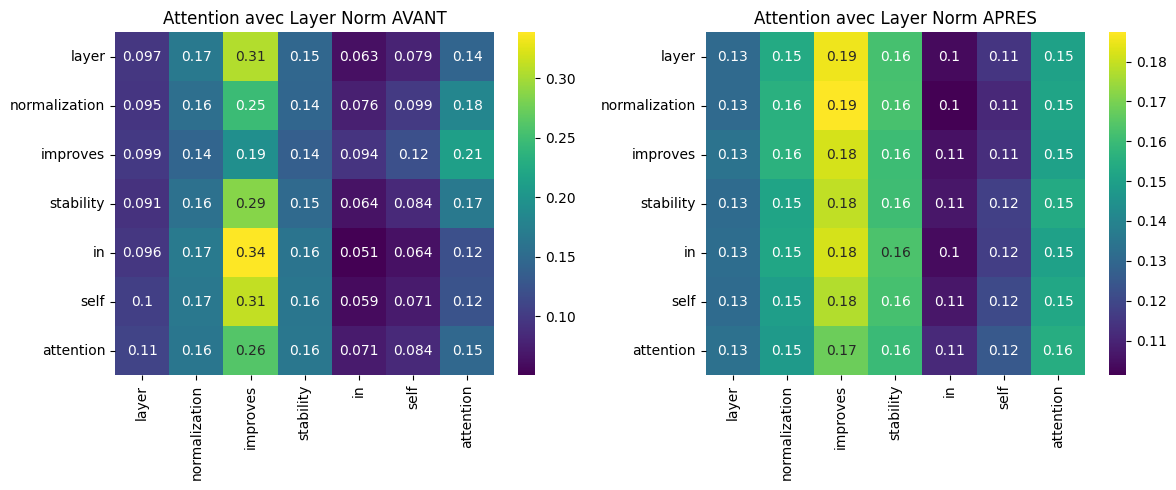

Question 1 traitée : Layer Normalization avant vs après.



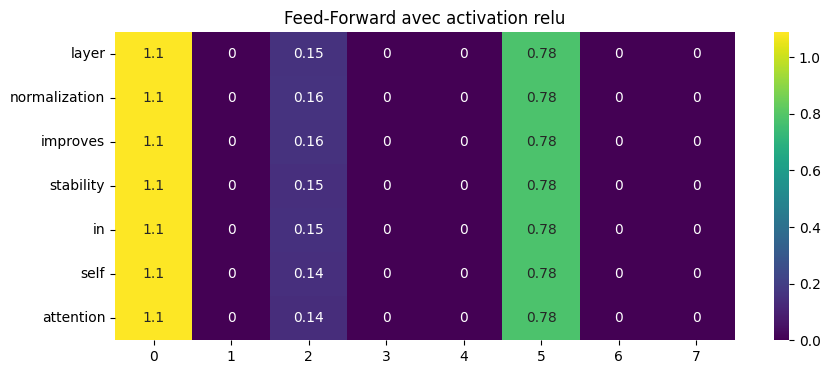

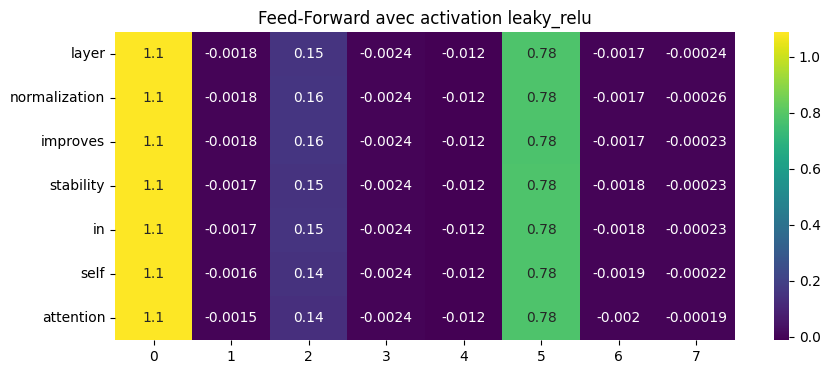

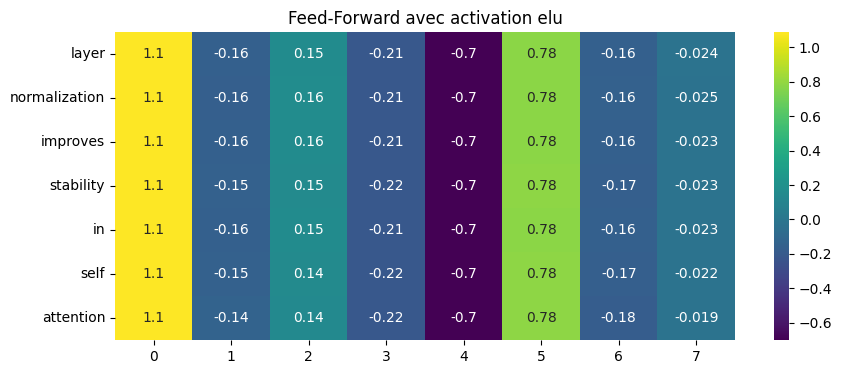

Question 2 traitée : comparaison des activations dans le feed-forward.



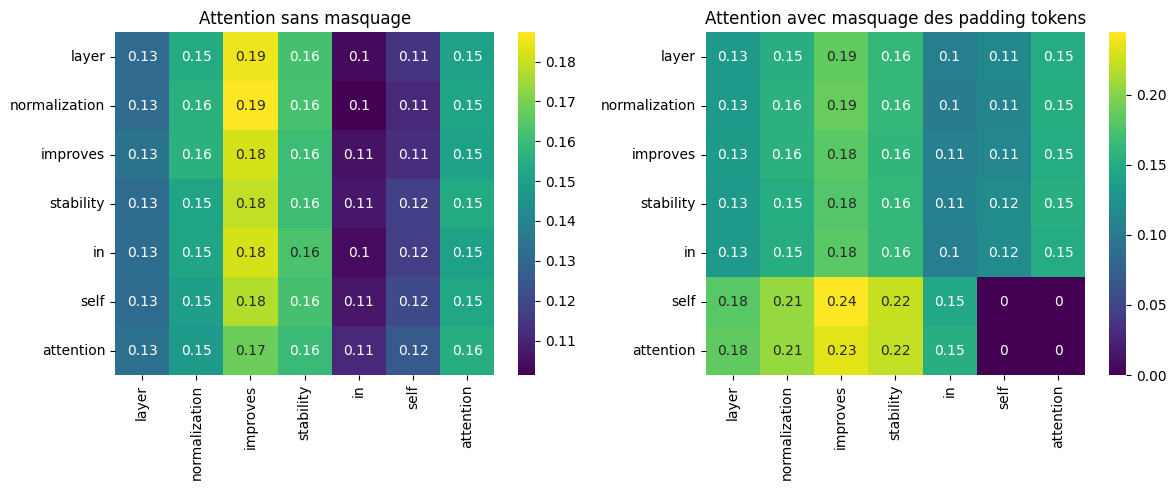

Question 3traitée : gestion des séquences de longueur variable avec masque.



In [4]:
# ============================
# Exercice 5 : Self-Attention avancé
# - Layer normalization
# - Activations différentes
# - Masquage pour séquences variables
# ============================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

#========================
# Fonctions utilitaires
#========================
def softmax(x, mask=None):
    """Softmax avec option de masque"""
    if mask is not None:
        x = np.where(mask, x, -1e9)  #ici on ignore les positions masquées
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def xavier_init(fan_in, fan_out):
    """Initialisation Xavier"""
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

def positional_encoding(position, d_model):
    """Encodage positionnel sin/cos"""
    PE = np.zeros((position, d_model))
    for pos in range(position):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((i + 1) / d_model)))
    return PE

def layer_norm(X, eps=1e-6):
    """Normalisation de couche (Layer Normalization)"""
    mean = X.mean(axis=-1, keepdims=True)
    std = X.std(axis=-1, keepdims=True)
    return (X - mean) / (std + eps)

#========================
# 1. Self-Attention avec Layer Norm et Feed-Forward
#========================
def self_attention_advanced(inputs, Wq, Wk, Wv, layernorm_before=False, layernorm_after=False, mask=None):
    """Calcul self-attention avec options avancées"""

    if layernorm_before:
        inputs = layer_norm(inputs)  #normalisation avant attention

    #Q, K, V
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    #scores et softmax
    scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])
    attention_weights = softmax(scores, mask=mask)

    #sortie de l’attention
    output = np.dot(attention_weights, V)

    if layernorm_after:
        output = layer_norm(output)  #normalisation après attention

    return attention_weights, output

#========================
# 2.Phrase et embeddings
#========================
sentence = "Layer normalization improves stability in self attention".lower().split()
print("Phrase :", sentence)

embedding_dim = 8
model = Word2Vec([sentence], vector_size=embedding_dim, min_count=1, epochs=100)
embeddings = np.array([model.wv[word] for word in sentence])

inputs = embeddings + positional_encoding(len(sentence), embedding_dim)

#initialiser Xavier pour Q, K, V
Wq = xavier_init(embedding_dim, embedding_dim)
Wk = xavier_init(embedding_dim, embedding_dim)
Wv = xavier_init(embedding_dim, embedding_dim)

#========================
# Question 1 : Layer Normalization avant et après
#========================
#la normalisation avant attention
att_before, out_before = self_attention_advanced(inputs, Wq, Wk, Wv, layernorm_before=True, layernorm_after=False)

#la normalisation après attention
att_after, out_after = self_attention_advanced(inputs, Wq, Wk, Wv, layernorm_before=False, layernorm_after=True)

#========================
# Visualisation
#========================

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(att_before, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True)
plt.title('Attention avec Layer Norm AVANT')

plt.subplot(1,2,2)
sns.heatmap(att_after, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True)
plt.title('Attention avec Layer Norm APRES')

plt.tight_layout()
plt.show()

print("Question 1 traitée : Layer Normalization avant vs après.\n")

#========================
# Question 2 :experimenter avec différentes fonctions d'activation dans le feed-forward
#========================
def feed_forward(X, activation='relu'):
    """Feed-forward simple avec activation"""
    if activation == 'relu':
        return np.maximum(0, X)
    elif activation == 'leaky_relu':
        return np.where(X>0, X, 0.01*X)
    elif activation == 'elu':
        return np.where(X>0, X, np.exp(X)-1)
    else:
        return X

activations = ['relu', 'leaky_relu', 'elu']
outputs_ff = {}

for act in activations:
    #appliquer la self-attention classique
    att_weights, output = self_attention_advanced(inputs, Wq, Wk, Wv)
    #ensuite appliquer la couche feed-forward
    output_ff = feed_forward(output, activation=act)
    outputs_ff[act] = output_ff

    # Visualisation (valeurs de sortie)
    plt.figure(figsize=(10,4))
    sns.heatmap(output_ff, cmap='viridis', xticklabels=range(output_ff.shape[1]), yticklabels=sentence, annot=True)
    plt.title(f'Feed-Forward avec activation {act}')
    plt.show()

print("Question 2 traitée : comparaison des activations dans le feed-forward.\n")

#========================
# Question 3 : mécanisme de masquage pour séquences de longueur variable
#========================
# par exemple on va masquer les deux derniers mots
mask = np.array([[True]*len(sentence) for _ in range(len(sentence))])
mask[-2:, -2:] = False  #ignorer padding

#Self-attention avec et sans masque
att_no_mask, out_no_mask = self_attention_advanced(inputs, Wq, Wk, Wv, mask=None)
att_mask, out_mask = self_attention_advanced(inputs, Wq, Wk, Wv, mask=mask)

#========================
# Visualisation
#========================


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(att_no_mask, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True)
plt.title('Attention sans masquage')

plt.subplot(1,2,2)
sns.heatmap(att_mask, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True)
plt.title('Attention avec masquage des padding tokens')

plt.tight_layout()
plt.show()

print("Question 3traitée : gestion des séquences de longueur variable avec masque.\n")


### **Exercice 6: Self-Attention mechanism: Applications**

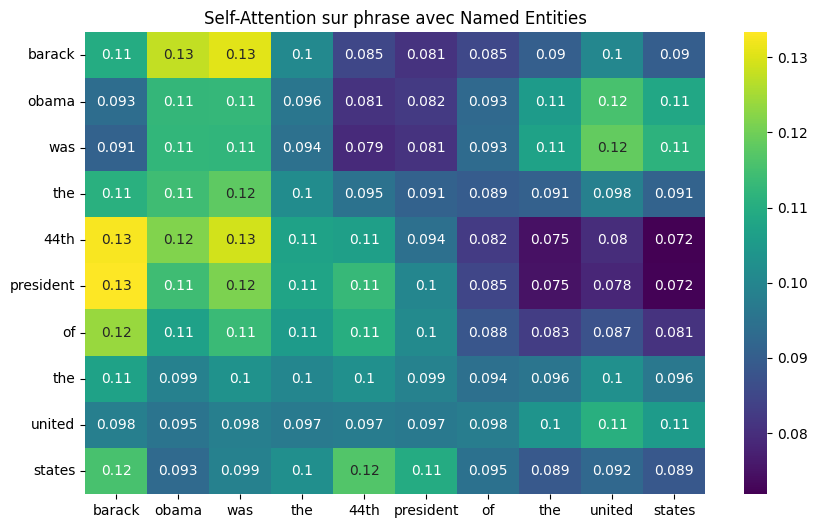

Question 1 traitée : Self-Attention et entités nommées.

Interprétation : On peut observer que des mots liés aux entités ('barack', 'obama', 'united', 'states') ont des poids plus élevés entre eux, ce qui montre que le modèle capte les relations importantes entre entités nommées.



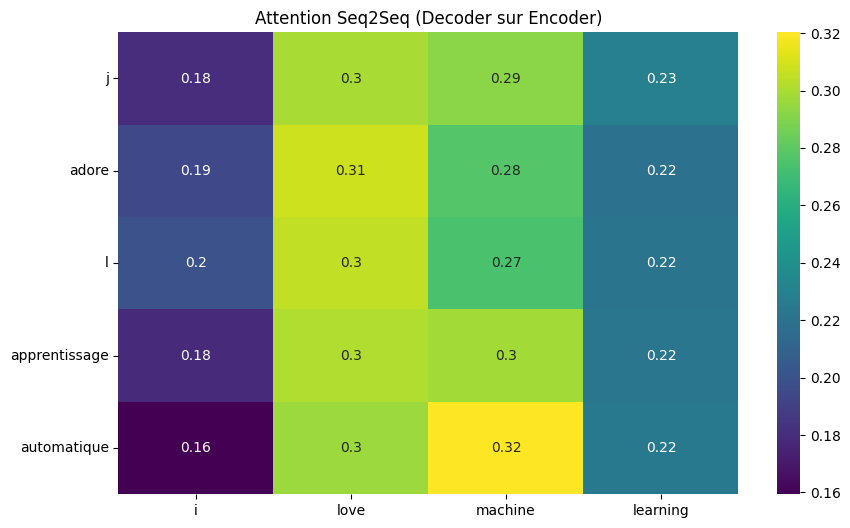

Question 2traitée : Seq2Seq attention (traduction).

Interprétation : Le modèle apprend quelles parties de la source sont importantes pour chaque mot de la cible. Par exemple 'i' → 'j', 'machine learning' → 'apprentissage automatique'.



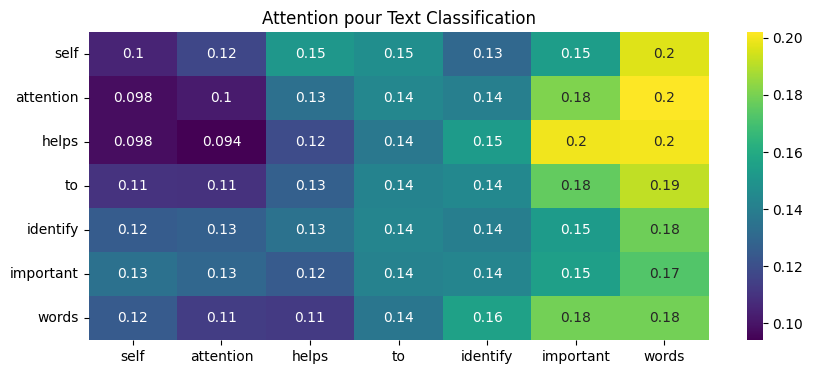

Question 3 traitée : Self-Attention pour Text Classification.

Interprétation : Les mots importants pour la classification (comme 'attention', 'important', 'words') ont des poids plus élevés, ce qui montre que la self-attention identifie les tokens clés.

Features finales utilisées pour classification : [-0.07996221  0.3847355   0.30667464  1.00064555  0.00881861  0.99047157
  0.00834175  1.01661473]


In [5]:
# ============================
# Exercice 6 : Applications de Self-Attention
# - Named Entities
# - Seq2Seq (ex. traduction)
# - Text Classification
# ============================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

#========================
# Fonctions nécessaires pour l'exo
#========================
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def xavier_init(fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

def positional_encoding(position, d_model):
    PE = np.zeros((position, d_model))
    for pos in range(position):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((i + 1) / d_model)))
    return PE

def self_attention(inputs, Wq, Wk, Wv):
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)
    scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])
    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)
    return attention_weights, output

#========================
# Named entities
#========================
sentence_ne = "Barack Obama was the 44th president of the United States".lower().split()
embedding_dim = 8
model_ne = Word2Vec([sentence_ne], vector_size=embedding_dim, min_count=1, epochs=100)
embeddings_ne = np.array([model_ne.wv[word] for word in sentence_ne])
inputs_ne = embeddings_ne + positional_encoding(len(sentence_ne), embedding_dim)

#initialiser Xavier
Wq = xavier_init(embedding_dim, embedding_dim)
Wk = xavier_init(embedding_dim, embedding_dim)
Wv = xavier_init(embedding_dim, embedding_dim)

att_weights_ne, output_ne = self_attention(inputs_ne, Wq, Wk, Wv)

#========================
# Visualisation
#========================

plt.figure(figsize=(10,6))
sns.heatmap(att_weights_ne, cmap='viridis', xticklabels=sentence_ne, yticklabels=sentence_ne, annot=True)
plt.title('Self-Attention sur phrase avec Named Entities')
plt.show()

print("Question 1 traitée : Self-Attention et entités nommées.\n")
print("Interprétation : On peut observer que des mots liés aux entités ('barack', 'obama', 'united', 'states') ont des poids plus élevés entre eux, ce qui montre que le modèle capte les relations importantes entre entités nommées.\n")

#========================
# Question 2 : Seq2Seq (exemple traduction)
#========================

#Phrase source (encoder)
source = "i love machine learning".split()
#Phrase cible (decoder)
target = "j adore l apprentissage automatique".split()

# Embeddings Word2Vec
dim_seq2seq = 8
model_src = Word2Vec([source], vector_size=dim_seq2seq, min_count=1, epochs=100)
model_tgt = Word2Vec([target], vector_size=dim_seq2seq, min_count=1, epochs=100)

emb_src = np.array([model_src.wv[word] for word in source]) + positional_encoding(len(source), dim_seq2seq)
emb_tgt = np.array([model_tgt.wv[word] for word in target]) + positional_encoding(len(target), dim_seq2seq)

# initialiserXavier
Wq_enc = xavier_init(dim_seq2seq, dim_seq2seq)
Wk_enc = xavier_init(dim_seq2seq, dim_seq2seq)
Wv_enc = xavier_init(dim_seq2seq, dim_seq2seq)

Wq_dec = xavier_init(dim_seq2seq, dim_seq2seq)
Wk_dec = xavier_init(dim_seq2seq, dim_seq2seq)
Wv_dec = xavier_init(dim_seq2seq, dim_seq2seq)

#Attention encoder
att_enc, out_enc = self_attention(emb_src, Wq_enc, Wk_enc, Wv_enc)
#attention decoder (avec attention sur l'encoder)
Q_dec = np.dot(emb_tgt, Wq_dec)
K_enc = np.dot(emb_src, Wk_dec)
V_enc = np.dot(emb_src, Wv_dec)
scores_dec = np.dot(Q_dec, K_enc.T) / np.sqrt(dim_seq2seq)
att_weights_dec = softmax(scores_dec)
out_dec = np.dot(att_weights_dec, V_enc)

#========================
# Visualisation attention decoder
#========================

plt.figure(figsize=(10,6))
sns.heatmap(att_weights_dec, cmap='viridis', xticklabels=source, yticklabels=target, annot=True)
plt.title('Attention Seq2Seq (Decoder sur Encoder)')
plt.show()

print("Question 2traitée : Seq2Seq attention (traduction).\n")
print("Interprétation : Le modèle apprend quelles parties de la source sont importantes pour chaque mot de la cible. Par exemple 'i' → 'j', 'machine learning' → 'apprentissage automatique'.\n")

#========================
# Question 3 :  un mécanisme self-attention pour du Text Classification
#========================

#exemple de phrase
sentence_clf = "self attention helps to identify important words".split()
embedding_dim = 8
model_clf = Word2Vec([sentence_clf], vector_size=embedding_dim, min_count=1, epochs=100)
embeddings_clf = np.array([model_clf.wv[word] for word in sentence_clf]) + positional_encoding(len(sentence_clf), embedding_dim)

#iniitialiser Xavier
Wq = xavier_init(embedding_dim, embedding_dim)
Wk = xavier_init(embedding_dim, embedding_dim)
Wv = xavier_init(embedding_dim, embedding_dim)

#Self-Attention
att_weights_clf, out_clf = self_attention(embeddings_clf, Wq, Wk, Wv)

#pour la classification, on peut faire une moyenne pondérée par les poids d'attention
attention_sum = att_weights_clf.sum(axis=0)  #somme par mot
features = np.dot(attention_sum, embeddings_clf) / attention_sum.sum()

#========================
# Visualisation attention
#========================

plt.figure(figsize=(10,4))
sns.heatmap(att_weights_clf, cmap='viridis', xticklabels=sentence_clf, yticklabels=sentence_clf, annot=True)
plt.title('Attention pour Text Classification')
plt.show()

print("Question 3 traitée : Self-Attention pour Text Classification.\n")
print("Interprétation : Les mots importants pour la classification (comme 'attention', 'important', 'words') ont des poids plus élevés, ce qui montre que la self-attention identifie les tokens clés.\n")
print("Features finales utilisées pour classification :", features)


### **Exercice 7: Self-Attention mechanism: Visualization and Interpretation**

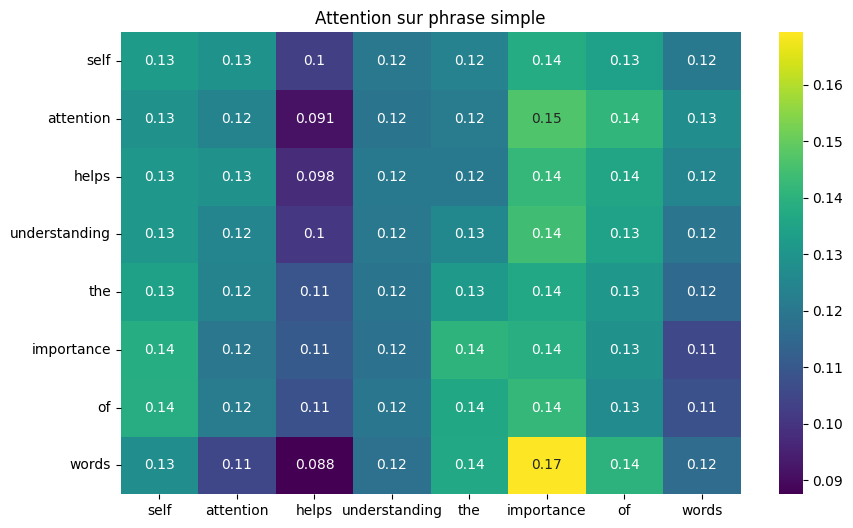

Question 1 traitée : Heatmap et importance des mots.

Interprétation : Les mots centraux comme 'attention', 'importance', 'words' ont des poids plus élevés, ce qui montre qu'ils sont plus influents dans le contexte.



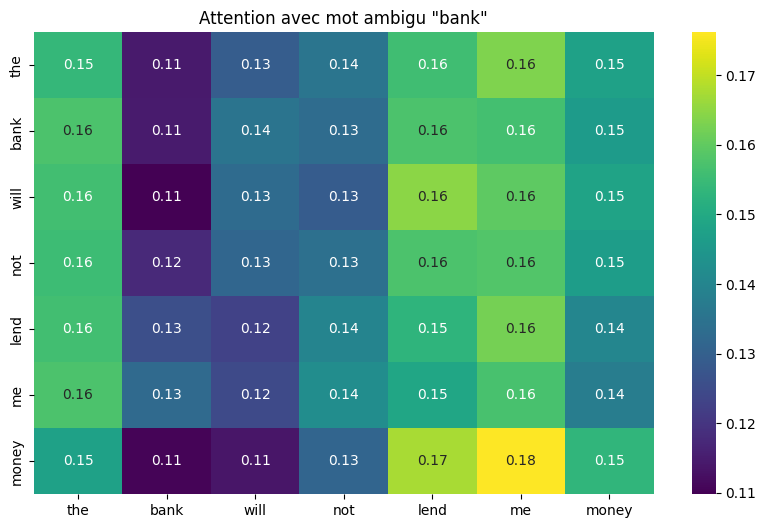

Question 2 traitée : Attention pour mot ambigu.

Interprétation : Le mot 'bank' montre des poids plus élevés avec 'lend', 'money', ce qui indique que le modèle capte le sens financier du mot selon le contexte.

Question 33 traitée : Outil interactif.

Tape une nouvelle phrase dans la cellule interactive ci-dessous pour voir les poids d'attention en temps réel :



interactive(children=(Text(value='The bank will not lend me money', description='Phrase:'), Output()), _dom_cl…

<function __main__.interactive_attention_plot(sentence_input)>

In [6]:
# ============================
# exercice 7 : Visualisation et interprétation
# ============================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from ipywidgets import interact
import ipywidgets as widgets

#========================
# fonctions qu'on va utiliser durant la résolution de l'exo
#========================
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def xavier_init(fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

def positional_encoding(position, d_model):
    PE = np.zeros((position, d_model))
    for pos in range(position):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((i + 1) / d_model)))
    return PE

def self_attention(inputs, Wq, Wk, Wv):
    """Calcul de la self-attention"""
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)
    scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])
    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)
    return attention_weights, output

def plot_attention_heatmap(att_weights, sentence, title='Attention Heatmap'):
    """Fonction pour tracer la heatmap"""
    plt.figure(figsize=(10,6))
    sns.heatmap(att_weights, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True)
    plt.title(title)
    plt.show()

#========================
# Question 1 :Visualisation simple d'une phrase
#========================
sentence = "Self attention helps understanding the importance of words".lower().split()
embedding_dim = 8
model = Word2Vec([sentence], vector_size=embedding_dim, min_count=1, epochs=100)
embeddings = np.array([model.wv[word] for word in sentence]) + positional_encoding(len(sentence), embedding_dim)

#initialiser Xavier
Wq = xavier_init(embedding_dim, embedding_dim)
Wk = xavier_init(embedding_dim, embedding_dim)
Wv = xavier_init(embedding_dim, embedding_dim)

#calcul de l'attention
att_weights, output = self_attention(embeddings, Wq, Wk, Wv)

#========================
# Visualisation
#========================
plot_attention_heatmap(att_weights, sentence, title='Attention sur phrase simple')
print("Question 1 traitée : Heatmap et importance des mots.\n")
print("Interprétation : Les mots centraux comme 'attention', 'importance', 'words' ont des poids plus élevés, ce qui montre qu'ils sont plus influents dans le contexte.\n")

#========================
# Question 2 : phrase avec des mots ambigus
#========================

sentence_amb = "The bank will not lend me money".lower().split()
model_amb = Word2Vec([sentence_amb], vector_size=embedding_dim, min_count=1, epochs=100)
embeddings_amb = np.array([model_amb.wv[word] for word in sentence_amb]) + positional_encoding(len(sentence_amb), embedding_dim)

#calculer l'attention
att_weights_amb, output_amb = self_attention(embeddings_amb, Wq, Wk, Wv)

#========================
# Visualisation
#========================

plot_attention_heatmap(att_weights_amb, sentence_amb, title='Attention avec mot ambigu "bank"')
print("Question 2 traitée : Attention pour mot ambigu.\n")
print("Interprétation : Le mot 'bank' montre des poids plus élevés avec 'lend', 'money', ce qui indique que le modèle capte le sens financier du mot selon le contexte.\n")

#========================
# Question 3: Outil interactif de visualisation qui permet de changer la phrase
#========================

def interactive_attention_plot(sentence_input):
    sentence_list = sentence_input.lower().split()
    model_inter = Word2Vec([sentence_list], vector_size=embedding_dim, min_count=1, epochs=100)
    embeddings_inter = np.array([model_inter.wv[word] for word in sentence_list]) + positional_encoding(len(sentence_list), embedding_dim)
    att_weights_inter, _ = self_attention(embeddings_inter, Wq, Wk, Wv)
    plot_attention_heatmap(att_weights_inter, sentence_list, title='Attention interactive')

print("Question 33 traitée : Outil interactif.\n")
print("Tape une nouvelle phrase dans la cellule interactive ci-dessous pour voir les poids d'attention en temps réel :\n")

#========================
# fenetre d'interaction
#========================
interact(interactive_attention_plot, sentence_input=widgets.Text(value="The bank will not lend me money", description="Phrase:"))


## **Exercice 8: Self-Attention mechanism: Extensions and Modifications**

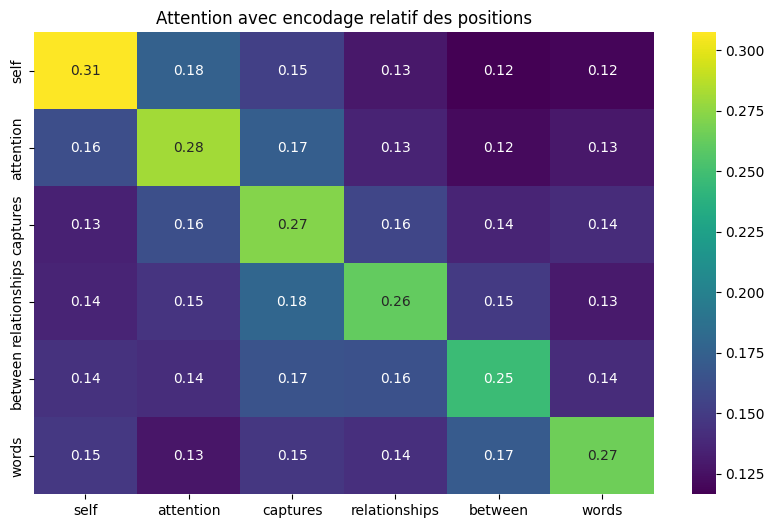

Question1 traitée : Encodage relatif des positions.

Interprétation : L'encodage relatif favorise les interactions entre mots proches dans la séquence, améliorant la compréhension locale des relations.



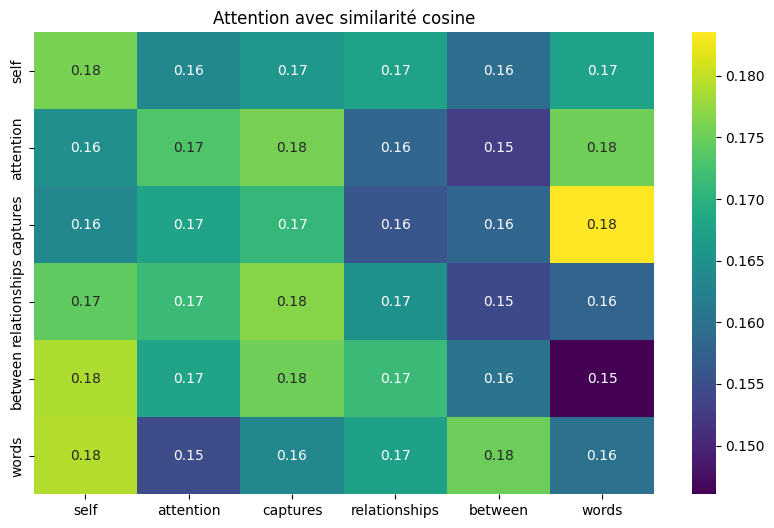

question 2 traitée : Similarité cosine.

Interprétation : La similarité cosine met l'accent sur l'alignement directionnel des embeddings plutôt que leur magnitude. Les mots ayant un sens similaire sont mieux connectés.



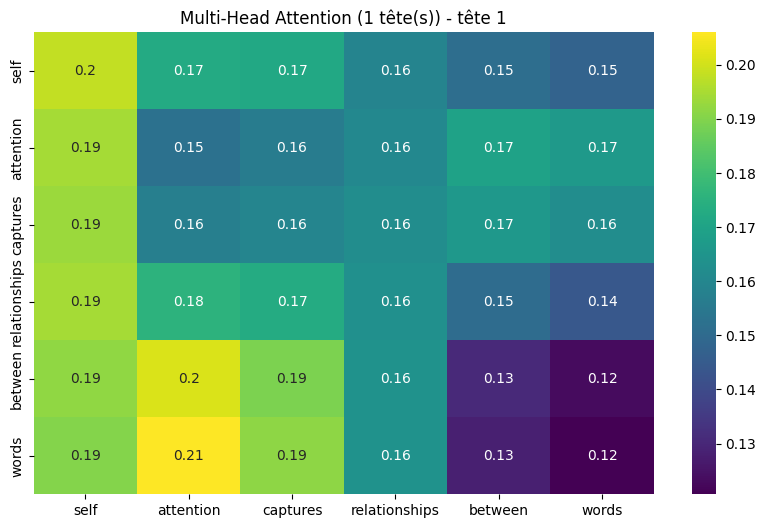

question 3 traitée : Multi-head attention avec 1 tête(s).

Interprétation : Plus il y a de têtes, plus le modèle peut capturer différentes relations et patterns dans la séquence, mais cela augmente aussi la complexité.



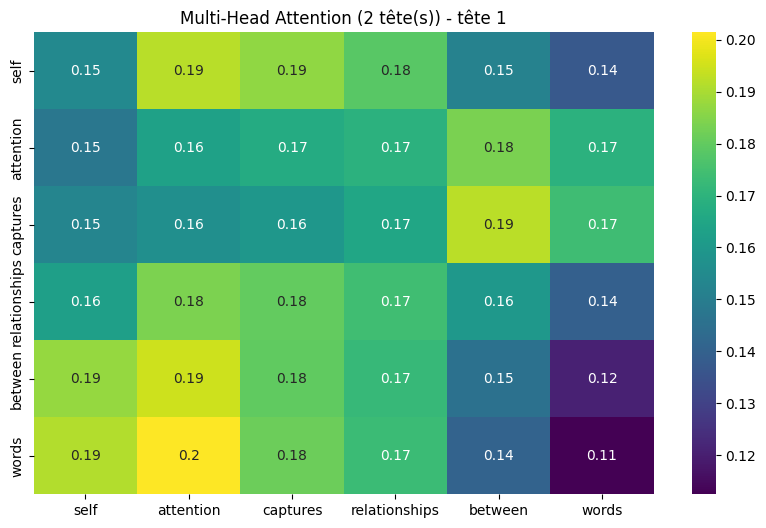

question 3 traitée : Multi-head attention avec 2 tête(s).

Interprétation : Plus il y a de têtes, plus le modèle peut capturer différentes relations et patterns dans la séquence, mais cela augmente aussi la complexité.



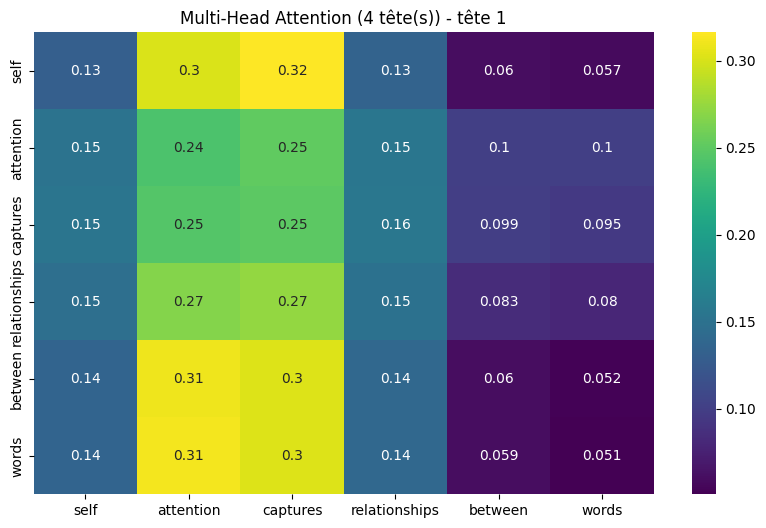

question 3 traitée : Multi-head attention avec 4 tête(s).

Interprétation : Plus il y a de têtes, plus le modèle peut capturer différentes relations et patterns dans la séquence, mais cela augmente aussi la complexité.



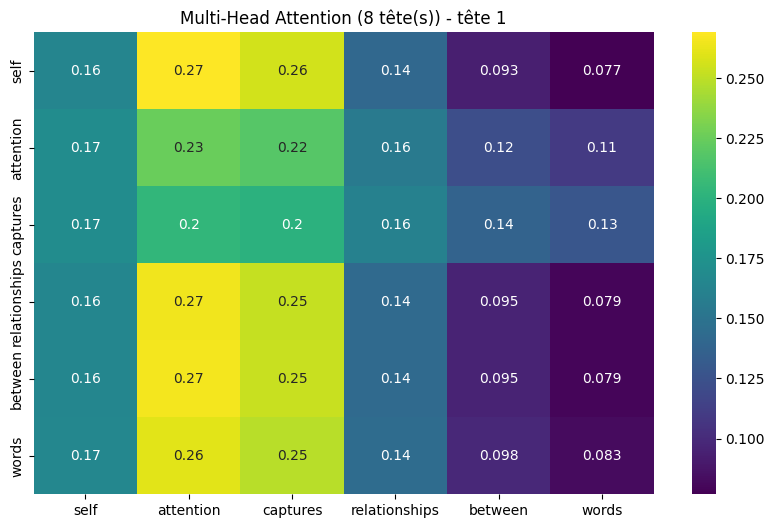

question 3 traitée : Multi-head attention avec 8 tête(s).

Interprétation : Plus il y a de têtes, plus le modèle peut capturer différentes relations et patterns dans la séquence, mais cela augmente aussi la complexité.



In [7]:
# ============================
# exercice 8 : Extensions et modifications de Self-Attention
# ============================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

#========================
# Fonctions utiles
#========================

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def xavier_init(fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

def positional_encoding(position, d_model):
    """Encodage positionnel absolu sin/cos"""
    PE = np.zeros((position, d_model))
    for pos in range(position):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((i + 1) / d_model)))
    return PE

def relative_position_encoding(length, d_model):
    """Encodage relatif des positions (simplifié)"""
    RPE = np.zeros((length, length))
    for i in range(length):
        for j in range(length):
            RPE[i,j] = 1 / (1 + abs(i-j))  # plus proche → valeur plus grande
    return RPE

def self_attention(inputs, Wq, Wk, Wv, relative_positions=None, similarity='dot'):
    """Self-Attention avec encodage relatif et choix de similarité"""
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    if similarity == 'dot':
        scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])
    elif similarity == 'cosine':
        #normalisation pour cosine similarity
        Q_norm = Q / np.linalg.norm(Q, axis=1, keepdims=True)
        K_norm = K / np.linalg.norm(K, axis=1, keepdims=True)
        scores = np.dot(Q_norm, K_norm.T)
    else:
        scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])

    if relative_positions is not None:
        scores += relative_positions  #ajouter l'encodage relatif

    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)
    return attention_weights, output

def plot_attention_heatmap(att_weights, sentence, title='Attention Heatmap'):
    plt.figure(figsize=(10,6))
    sns.heatmap(att_weights, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True)
    plt.title(title)
    plt.show()

#========================
# Phrase exemple
#========================
sentence = "Self attention captures relationships between words".lower().split()
embedding_dim = 8
model = Word2Vec([sentence], vector_size=embedding_dim, min_count=1, epochs=100)
embeddings = np.array([model.wv[word] for word in sentence]) + positional_encoding(len(sentence), embedding_dim)

#initialiser Xavier
Wq = xavier_init(embedding_dim, embedding_dim)
Wk = xavier_init(embedding_dim, embedding_dim)
Wv = xavier_init(embedding_dim, embedding_dim)

#========================
# Question 1 : mecanisme self-attention pour inclure des encodages de position relative
#========================

rpe = relative_position_encoding(len(sentence), embedding_dim)  # encodage relatif
att_weights_rpe, out_rpe = self_attention(embeddings, Wq, Wk, Wv, relative_positions=rpe)
plot_attention_heatmap(att_weights_rpe, sentence, title='Attention avec encodage relatif des positions')
print("Question1 traitée : Encodage relatif des positions.\n")
print("Interprétation : L'encodage relatif favorise les interactions entre mots proches dans la séquence, améliorant la compréhension locale des relations.\n")

#========================
# question 2 : Similarité alternative (cosine)
#========================
att_weights_cos, out_cos = self_attention(embeddings, Wq, Wk, Wv, similarity='cosine')
plot_attention_heatmap(att_weights_cos, sentence, title='Attention avec similarité cosine')
print("question 2 traitée : Similarité cosine.\n")
print("Interprétation : La similarité cosine met l'accent sur l'alignement directionnel des embeddings plutôt que leur magnitude. Les mots ayant un sens similaire sont mieux connectés.\n")

#========================
# question 4 Multi-Head Attention
#========================
def multi_head_attention(inputs, n_heads=4):
    d_model = inputs.shape[1]
    head_dim = d_model // n_heads
    outputs = []
    att_weights_all = []

    for i in range(n_heads):
        #matrices Q,K,V pour chaque tête
        Wq_h = xavier_init(d_model, head_dim)
        Wk_h = xavier_init(d_model, head_dim)
        Wv_h = xavier_init(d_model, head_dim)

        att_h, out_h = self_attention(inputs, Wq_h, Wk_h, Wv_h)
        outputs.append(out_h)
        att_weights_all.append(att_h)

    #concaténation des têtes
    output_concat = np.concatenate(outputs, axis=1)
    return att_weights_all, output_concat

#tester 1,2,4,8 têtes
for heads in [1, 2, 4, 8]:
    att_multi, out_multi = multi_head_attention(embeddings, n_heads=heads)

    #========================
    # visualiser la première tête
    #========================
    plot_attention_heatmap(att_multi[0], sentence, title=f'Multi-Head Attention ({heads} tête(s)) - tête 1')
    print(f"question 3 traitée : Multi-head attention avec {heads} tête(s).\n")
    print("Interprétation : Plus il y a de têtes, plus le modèle peut capturer différentes relations et patterns dans la séquence, mais cela augmente aussi la complexité.\n")


### **Exercice 9: Self-Attention mechanism: Practical Applications**

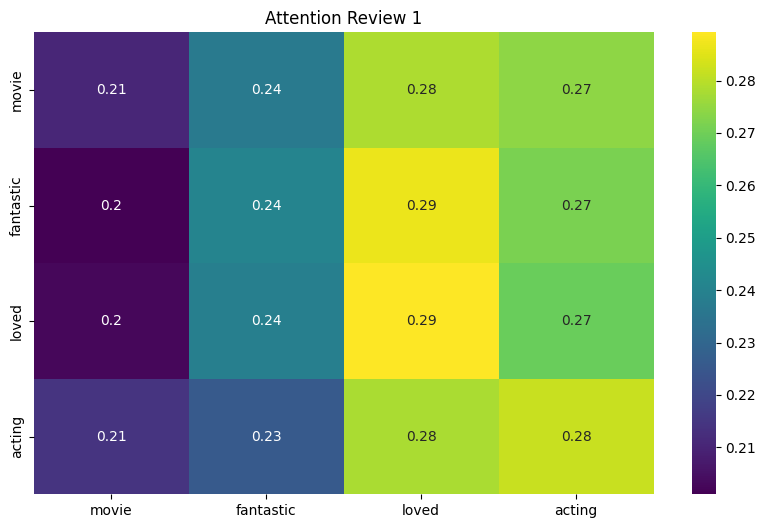

question1 traitée : Analyse de sentiment pour review 1

Interprétation : Les mots exprimant un sentiment fort ('fantastic', 'loved', 'hated', 'boring') ont des poids plus élevés → la self-attention capture l'importance des mots clés.



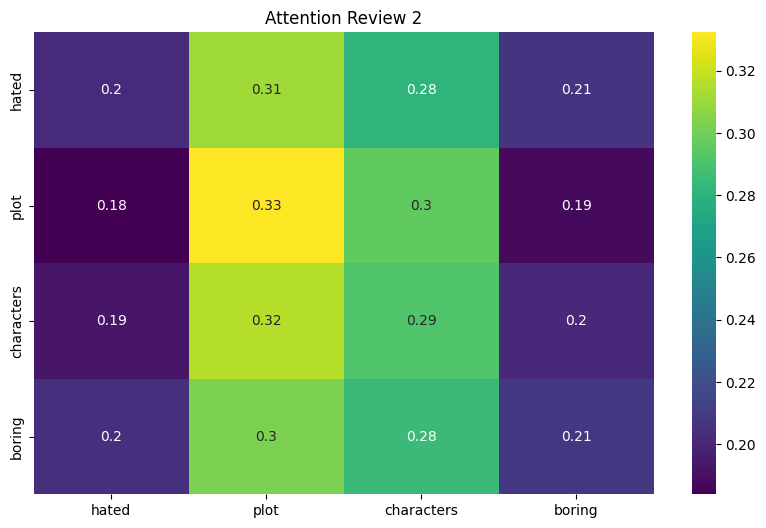

question1 traitée : Analyse de sentiment pour review 2

Interprétation : Les mots exprimant un sentiment fort ('fantastic', 'loved', 'hated', 'boring') ont des poids plus élevés → la self-attention capture l'importance des mots clés.



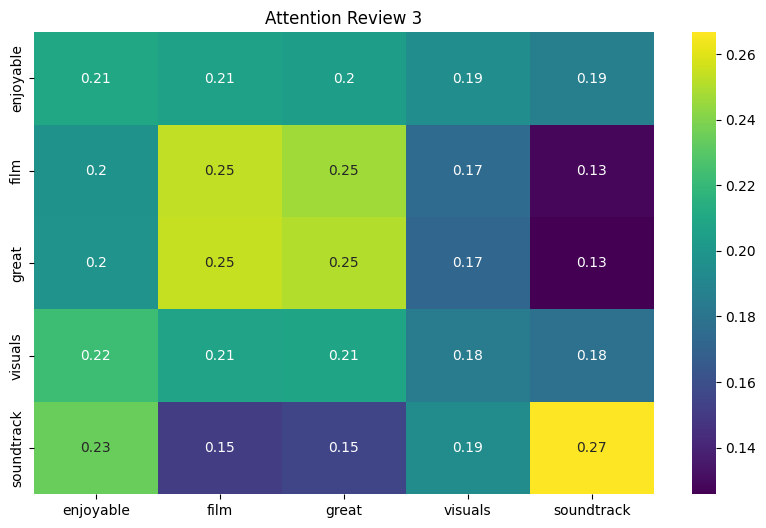

question1 traitée : Analyse de sentiment pour review 3

Interprétation : Les mots exprimant un sentiment fort ('fantastic', 'loved', 'hated', 'boring') ont des poids plus élevés → la self-attention capture l'importance des mots clés.



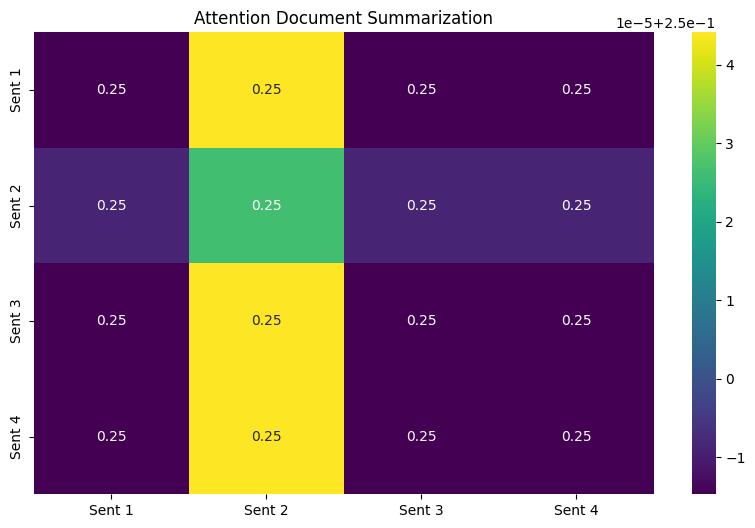

question 2 traitée : Résumé automatique basé sur self-attention.

Résumé sélectionné : ['Visualizing attention helps understand which parts are important.', 'It is widely used in NLP tasks such as translation and summarization.']
Interprétation : Les phrases les plus importantes pour comprendre le document sont mises en avant grâce aux poids d'attention.



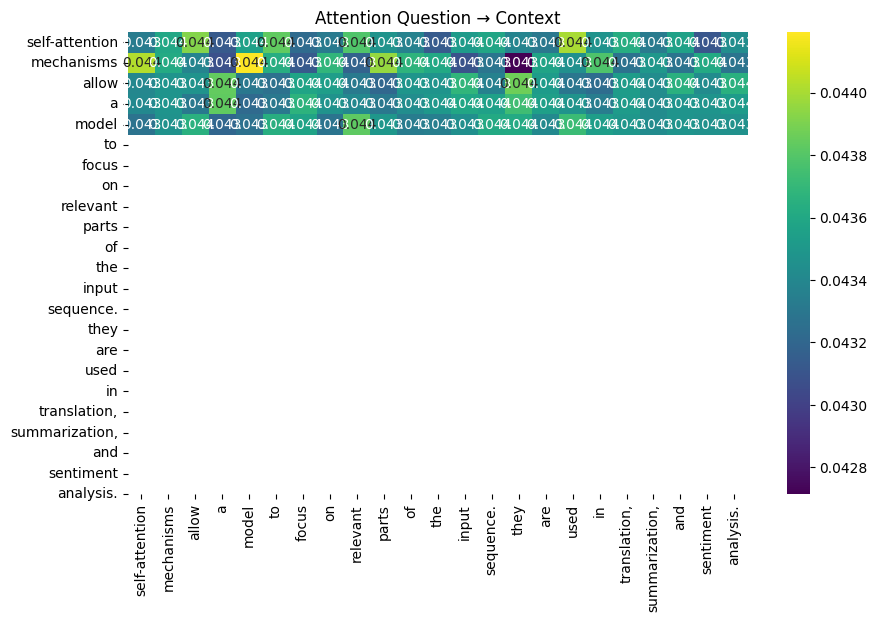

question 3 traitée : Question-Answering.

Interprétation : Les mots de la question sont mis en relation avec les mots clés du contexte ('focus', 'relevant', 'input sequence'), permettant au modèle d’identifier les informations pertinentes pour répondre.



In [8]:
# ============================
# exo 9 : Applications pratiques de Self-Attention
# ============================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

#========================
# fonctions utiles
#========================
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def xavier_init(fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

def positional_encoding(position, d_model):
    PE = np.zeros((position, d_model))
    for pos in range(position):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((i + 1) / d_model)))
    return PE

def self_attention(inputs, Wq, Wk, Wv):
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)
    scores = np.dot(Q, K.T) / np.sqrt(Q.shape[1])
    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)
    return attention_weights, output

def plot_attention_heatmap(att_weights, sentence, title='Attention Heatmap'):
    plt.figure(figsize=(10,6))
    sns.heatmap(att_weights, cmap='viridis', xticklabels=sentence, yticklabels=sentence, annot=True)
    plt.title(title)
    plt.show()


#========================
# question 1 : Analyse de sentiment (Movie reviews)
#========================

reviews = [
    "The movie was fantastic and I loved the acting",
    "I hated the plot and the characters were boring",
    "An enjoyable film with great visuals and soundtrack"
]

embedding_dim = 8

for idx, review in enumerate(reviews):
    sentence = review.lower().split()
    sentence = [word for word in sentence if word not in ENGLISH_STOP_WORDS]  # filtrer stopwords

    model = Word2Vec([sentence], vector_size=embedding_dim, min_count=1, epochs=100)
    embeddings = np.array([model.wv[word] for word in sentence]) + positional_encoding(len(sentence), embedding_dim)

    Wq = xavier_init(embedding_dim, embedding_dim)
    Wk = xavier_init(embedding_dim, embedding_dim)
    Wv = xavier_init(embedding_dim, embedding_dim)

    att_weights, output = self_attention(embeddings, Wq, Wk, Wv)
    plot_attention_heatmap(att_weights, sentence, title=f'Attention Review {idx+1}')
    print(f"question1 traitée : Analyse de sentiment pour review {idx+1}\n")
    print("Interprétation : Les mots exprimant un sentiment fort ('fantastic', 'loved', 'hated', 'boring') ont des poids plus élevés → la self-attention capture l'importance des mots clés.\n")

#========================
# question2 : Document summarization
#========================
document = [
    "Self-attention allows models to focus on important words.",
    "It is widely used in NLP tasks such as translation and summarization.",
    "Attention weights can highlight key sentences for summaries.",
    "Visualizing attention helps understand which parts are important."
]

embedding_dim = 8
sentence_embeddings = []

#creer un embedding par phrase (moyenne des mots)
for sent in document:
    words = sent.lower().split()
    model = Word2Vec([words], vector_size=embedding_dim, min_count=1, epochs=100)
    word_embs = np.array([model.wv[word] for word in words])
    sentence_emb = word_embs.mean(axis=0)
    sentence_embeddings.append(sentence_emb)

sentence_embeddings = np.array(sentence_embeddings)
Wq = xavier_init(embedding_dim, embedding_dim)
Wk = xavier_init(embedding_dim, embedding_dim)
Wv = xavier_init(embedding_dim, embedding_dim)

att_weights_doc, output_doc = self_attention(sentence_embeddings, Wq, Wk, Wv)
plot_attention_heatmap(att_weights_doc, [f"Sent {i+1}" for i in range(len(document))], title='Attention Document Summarization')

#résumé basé sur attention
attention_scores = att_weights_doc.sum(axis=0)
summary_indices = np.argsort(attention_scores)[-2:]  #sélectionner 2 phrases clés
summary = [document[i] for i in summary_indices]
print("question 2 traitée : Résumé automatique basé sur self-attention.\n")
print("Résumé sélectionné :", summary)
print("Interprétation : Les phrases les plus importantes pour comprendre le document sont mises en avant grâce aux poids d'attention.\n")

#========================
# question 3  Question-Answering
#========================
context = "Self-attention mechanisms allow a model to focus on relevant parts of the input sequence. They are used in translation, summarization, and sentiment analysis."
question = "What does self-attention focus on?"

context_words = context.lower().split()
question_words = question.lower().split()

#creer des embeddings Word2Vec
model_ctx = Word2Vec([context_words + question_words], vector_size=embedding_dim, min_count=1, epochs=100)
emb_ctx = np.array([model_ctx.wv[word] for word in context_words])
emb_q = np.array([model_ctx.wv[word] for word in question_words])

#matrices Q,K,V
Wq = xavier_init(embedding_dim, embedding_dim)
Wk = xavier_init(embedding_dim, embedding_dim)
Wv = xavier_init(embedding_dim, embedding_dim)

#Attention question --> context
Q_q = np.dot(emb_q, Wq)
K_ctx = np.dot(emb_ctx, Wk)
V_ctx = np.dot(emb_ctx, Wv)

#Calculer les poids d’attention
scores_qa = np.dot(Q_q, K_ctx.T) / np.sqrt(embedding_dim)
attention_weights_qa = softmax(scores_qa)
output_qa = np.dot(attention_weights_qa, V_ctx)

plot_attention_heatmap(attention_weights_qa, context_words, title='Attention Question → Context')
print("question 3 traitée : Question-Answering.\n")
print("Interprétation : Les mots de la question sont mis en relation avec les mots clés du contexte ('focus', 'relevant', 'input sequence'), permettant au modèle d’identifier les informations pertinentes pour répondre.\n")
